 # CE-QUAL-W2 Data Visualization Demo

In [1]:
import sys
sys.path.append('../src')

import cequalw2 as w2
import os
import sqlite3

In [2]:
data_path = 'data/BerlinMilton2006'

In [3]:
connection = sqlite3.connect('berlin_2006.db')

 ## Meteorology: Load, display, and plot the data

Air Temperature  Dew Point Temperature  Wind Speed  \
Date                                                                          
2006-01-01 00:00:00.000              0.6                   -0.6        3.89   
2006-01-01 01:00:00.800              0.6                   -0.6        3.89   
2006-01-01 02:00:00.200              1.1                   -0.6        3.26   
2006-01-01 03:00:00.000              1.1                   -0.6        3.96   
2006-01-01 04:00:00.800              1.1                   -0.6        3.58   
...                                  ...                    ...         ...   
2006-12-31 20:00:00.200             11.0                    7.4        7.09   
2006-12-31 21:00:00.000             10.6                    8.5        7.04   
2006-12-31 22:00:00.800             11.1                    9.5        8.34   
2006-12-31 23:00:00.200             11.3                    9.6        5.12   
2007-01-01 00:00:00.000             11.3                    9.6        5.12   

                         Wind Direction  Cloudiness  Solar Radiation  
Date                                                                  
2006-01-01 00:00:00.000            4.01        10.0                0  
2006-01-01 01:00:00.800            4.01        10.0                0  
2006-01-01 02:00:00.200            4.01        10.0                0  
2006-01-01 03:00:00.000            4.04        10.0                0  
2006-01-01 04:00:00.800            4.16        10.0                0  
...                                 ...         ...              ...  
2006-12-31 20:00:00.200            2.44        10.0                0  
2006-12-31 21:00:00.000            2.44        10.0                0  
2006-12-31 22:00:00.800            2.47        10.0                0  
2006-12-31 23:00:00.200            2.80        10.0                0  
2007-01-01 00:00:00.000            2.80        10.0                0  

[8761 rows x 6 columns]

Air Temperature  Dew Point Temperature  Wind Speed  \
Date                                                                          
2006-01-01 00:00:00.000              0.6                   -0.6        3.89   
2006-01-01 01:00:00.800              0.6                   -0.6        3.89   
2006-01-01 02:00:00.200              1.1                   -0.6        3.26   
2006-01-01 03:00:00.000              1.1                   -0.6        3.96   
2006-01-01 04:00:00.800              1.1                   -0.6        3.58   
...                                  ...                    ...         ...   
2006-12-31 20:00:00.200             11.0                    7.4        7.09   
2006-12-31 21:00:00.000             10.6                    8.5        7.04   
2006-12-31 22:00:00.800             11.1                    9.5        8.34   
2006-12-31 23:00:00.200             11.3                    9.6        5.12   
2007-01-01 00:00:00.000             11.3                    9.6        5.12   

                         Wind Direction  Cloudiness  Solar Radiation  
Date                                                                  
2006-01-01 00:00:00.000            4.01        10.0                0  
2006-01-01 01:00:00.800            4.01        10.0                0  
2006-01-01 02:00:00.200            4.01        10.0                0  
2006-01-01 03:00:00.000            4.04        10.0                0  
2006-01-01 04:00:00.800            4.16        10.0                0  
...                                 ...         ...              ...  
2006-12-31 20:00:00.200            2.44        10.0                0  
2006-12-31 21:00:00.000            2.44        10.0                0  
2006-12-31 22:00:00.800            2.47        10.0                0  
2006-12-31 23:00:00.200            2.80        10.0                0  
2007-01-01 00:00:00.000            2.80        10.0                0  

[8761 rows x 6 columns]

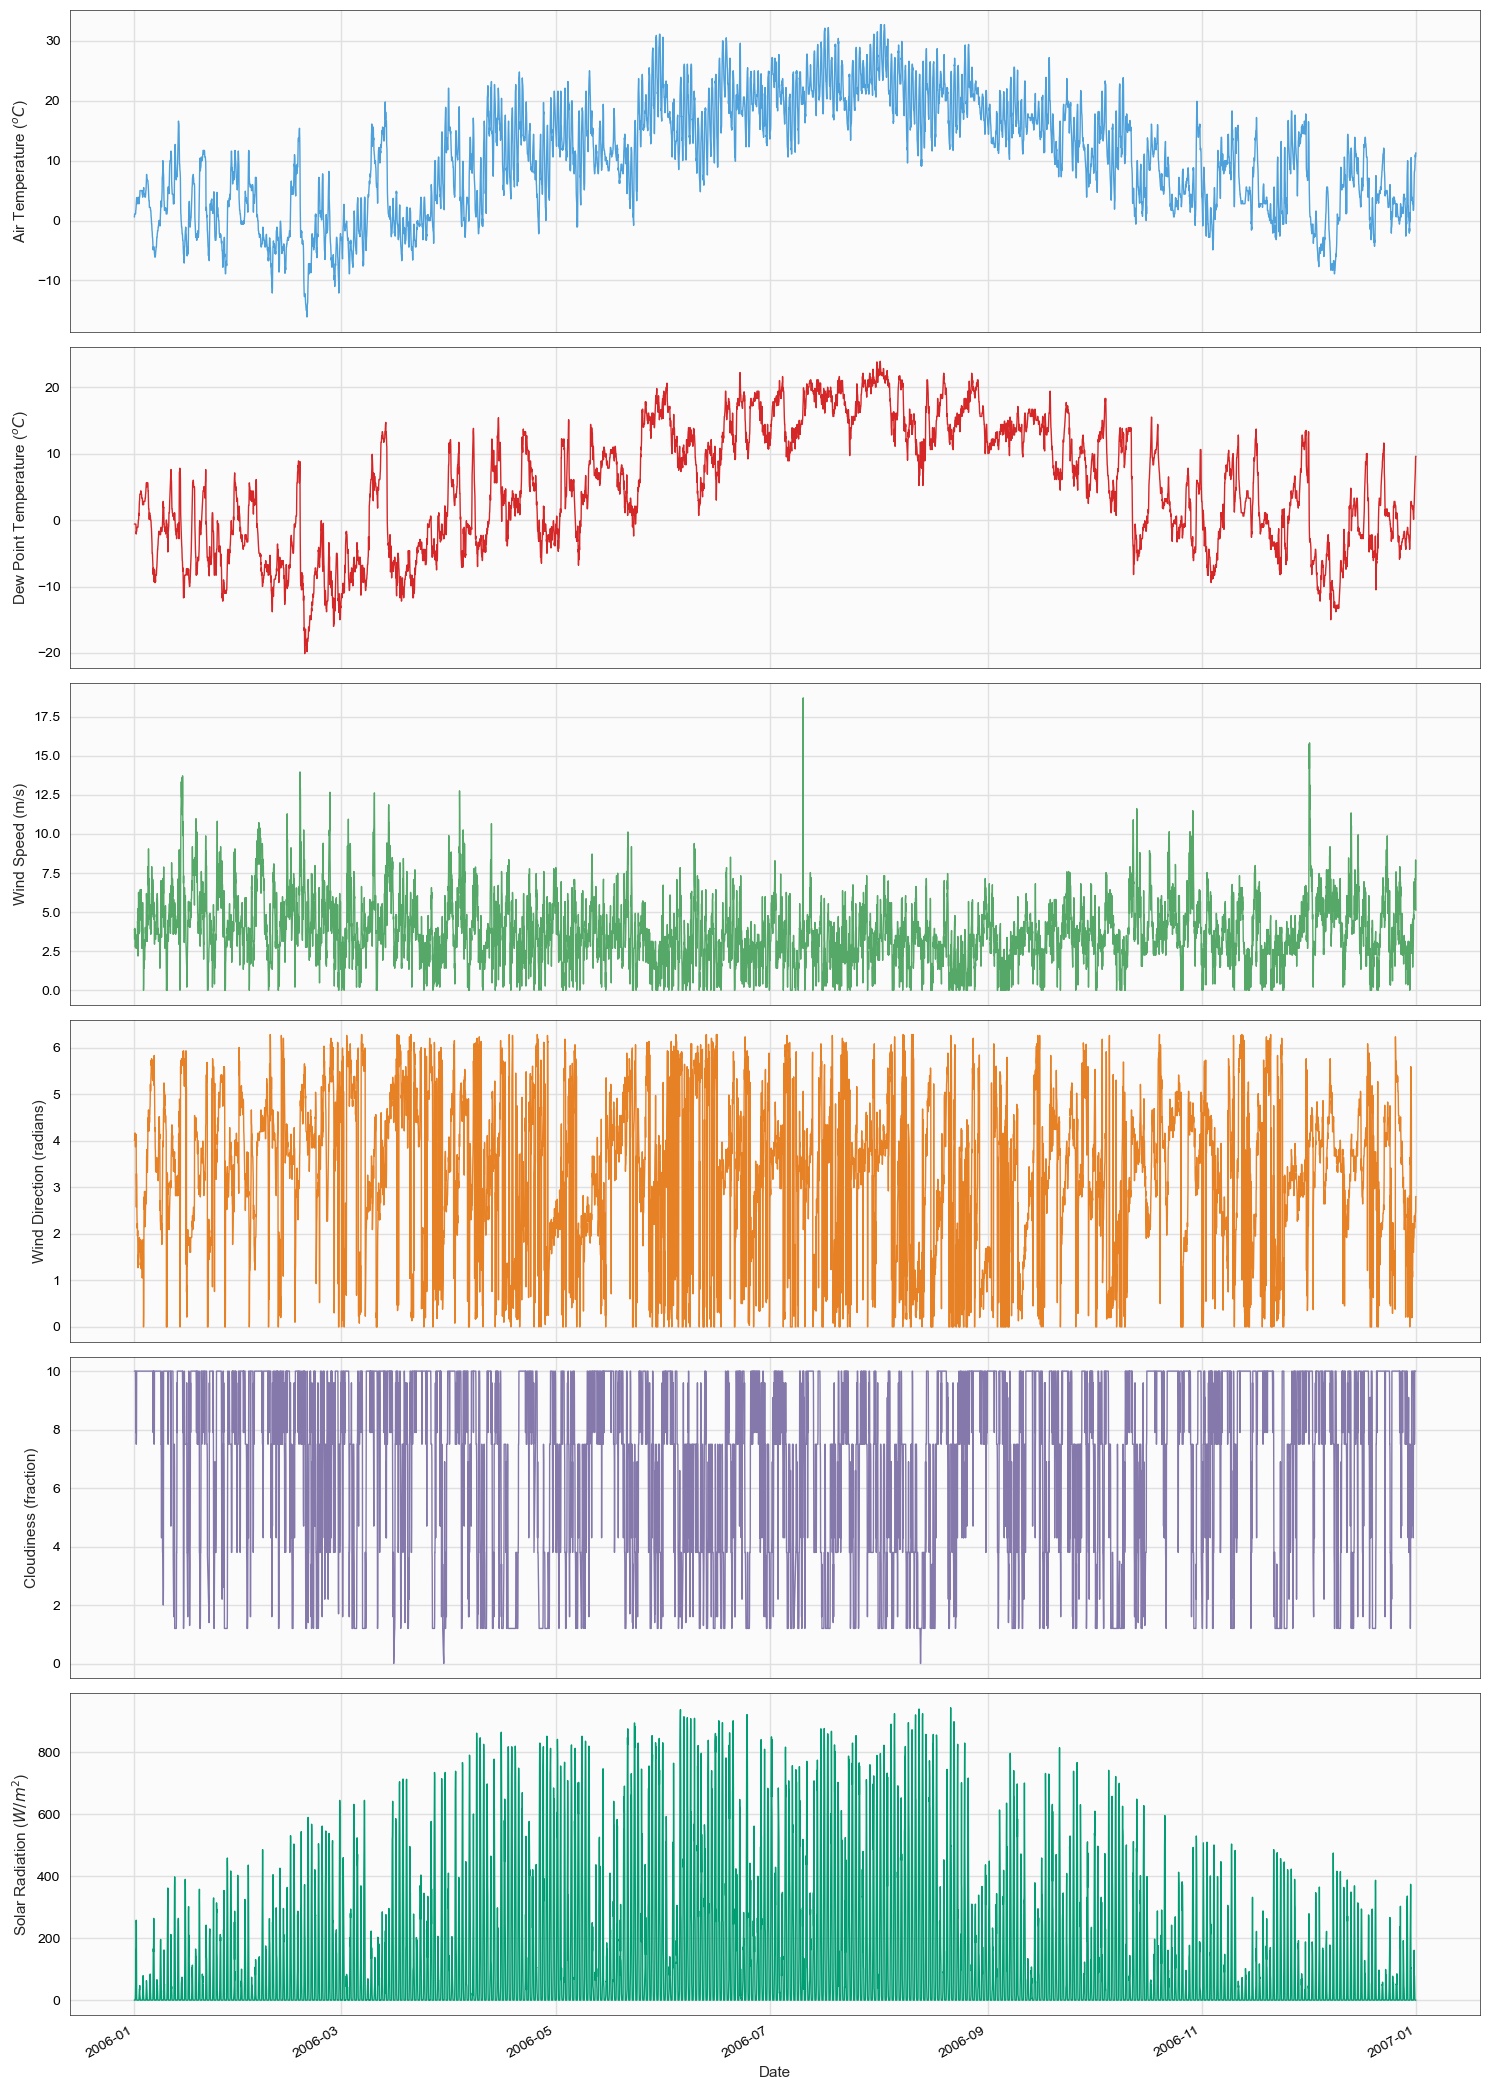

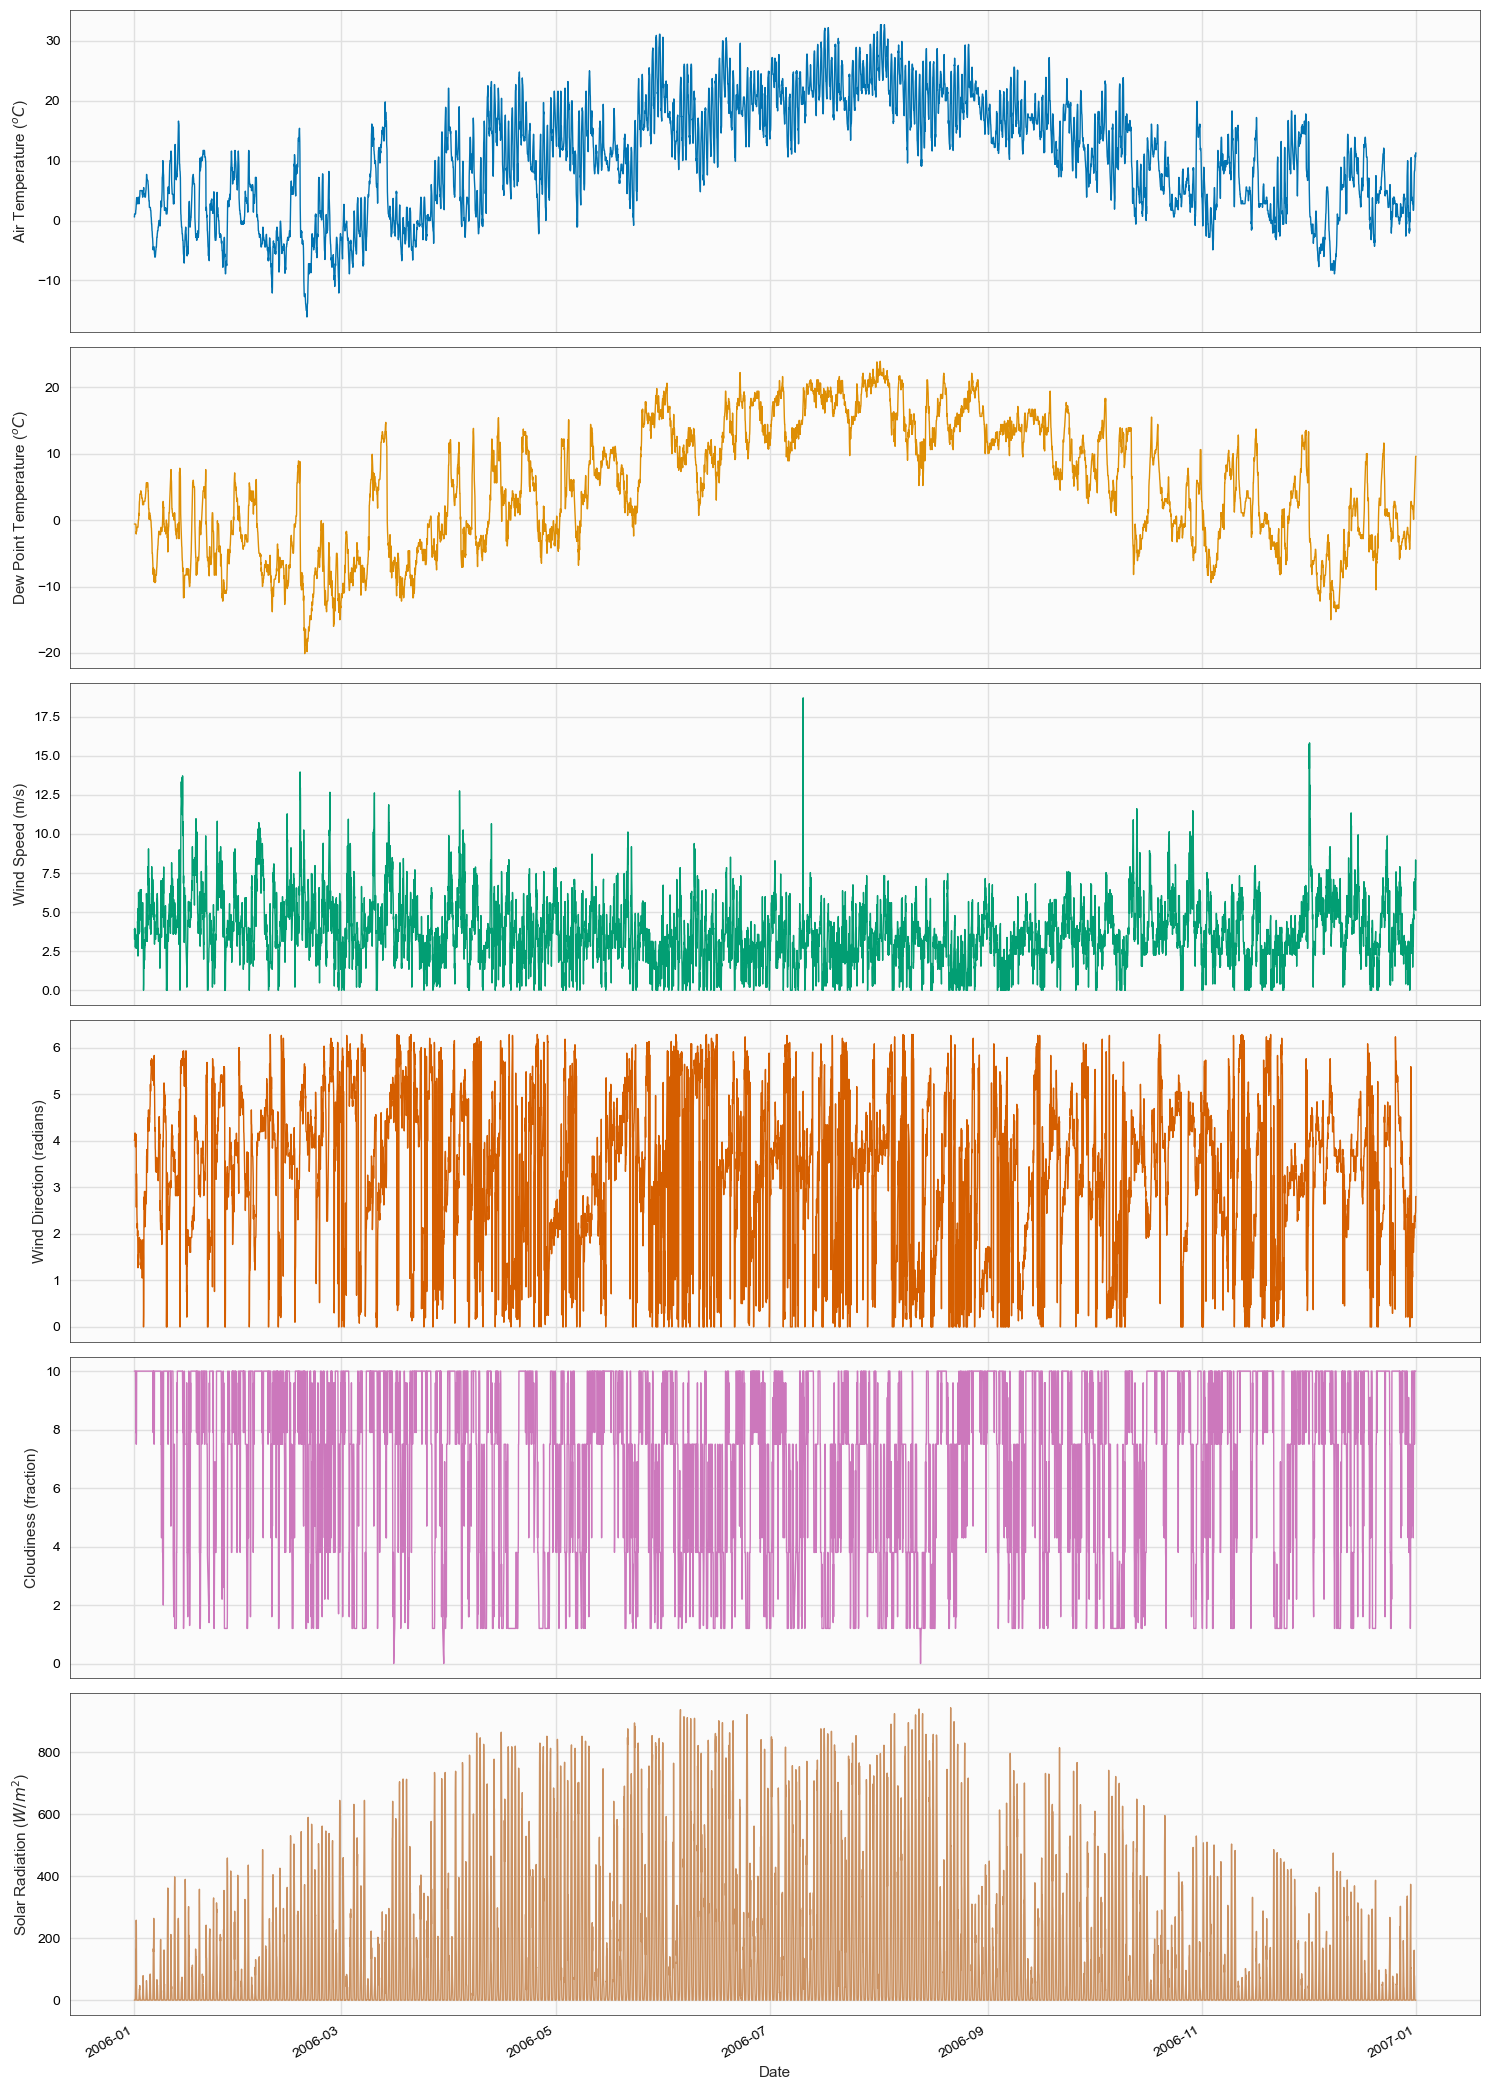

In [4]:
data_columns = [
    'Air Temperature',
    'Dew Point Temperature',
    'Wind Speed',
    'Wind Direction',
    'Cloudiness',
    'Solar Radiation'
]

ylabels = [
    'Air Temperature ($^oC$)',
    'Dew Point Temperature ($^oC$)',
    'Wind Speed (m/s)',
    'Wind Direction (radians)',
    'Cloudiness (fraction)',
    'Solar Radiation ($W/m^2$)'
]

met_wb1 = w2.read(os.path.join(data_path, '2006_Met.npt'), 2006, data_columns)
met_wb2 = w2.read(os.path.join(data_path, '2006_Met1.npt'), 2006, data_columns)

display(met_wb1)
display(met_wb2)

w2.multi_plot(met_wb1, ylabels=ylabels, colors=w2.k2)
w2.multi_plot(met_wb2, ylabels=ylabels, palette='colorblind')

# Save data to SQLite database
met_wb1.to_sql('met_wb1', connection, if_exists='replace', index=True)
met_wb2.to_sql('met_wb2', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(met_wb1, 'inputs/met_wb1', 'berlin_2006.h5')
w2.write_hdf(met_wb2, 'inputs/met_wb2', 'berlin_2006.h5')

## Read the dataset back in from HDF5

In [5]:
df = w2.read_hdf('inputs/met_wb1', 'berlin_2006.h5', data_columns)

 ## QIN (inflows), Berlin Model, 2006

 Input files:
 * BR1: 2006_DeerCrk_Qin.npt
 * BR2: 2006_WillowCrk_Qin.npt
 * BR3: 2006_IslandCrk_Qin.npt
 * BR4: 2006_MillCrk_Qin.npt

Inflow (QIN)
Date                                 
2006-01-01 00:00:00.000          1.02
2006-01-01 01:00:00.800          0.92
2006-01-01 02:00:00.200          0.91
2006-01-01 03:00:00.000          1.00
2006-01-01 04:00:00.800          1.00
...                               ...
2006-12-31 20:00:00.200          1.07
2006-12-31 21:00:00.000          0.98
2006-12-31 22:00:00.800          1.07
2006-12-31 23:00:00.200          1.26
2007-01-01 00:00:00.000          1.36

[8761 rows x 1 columns]

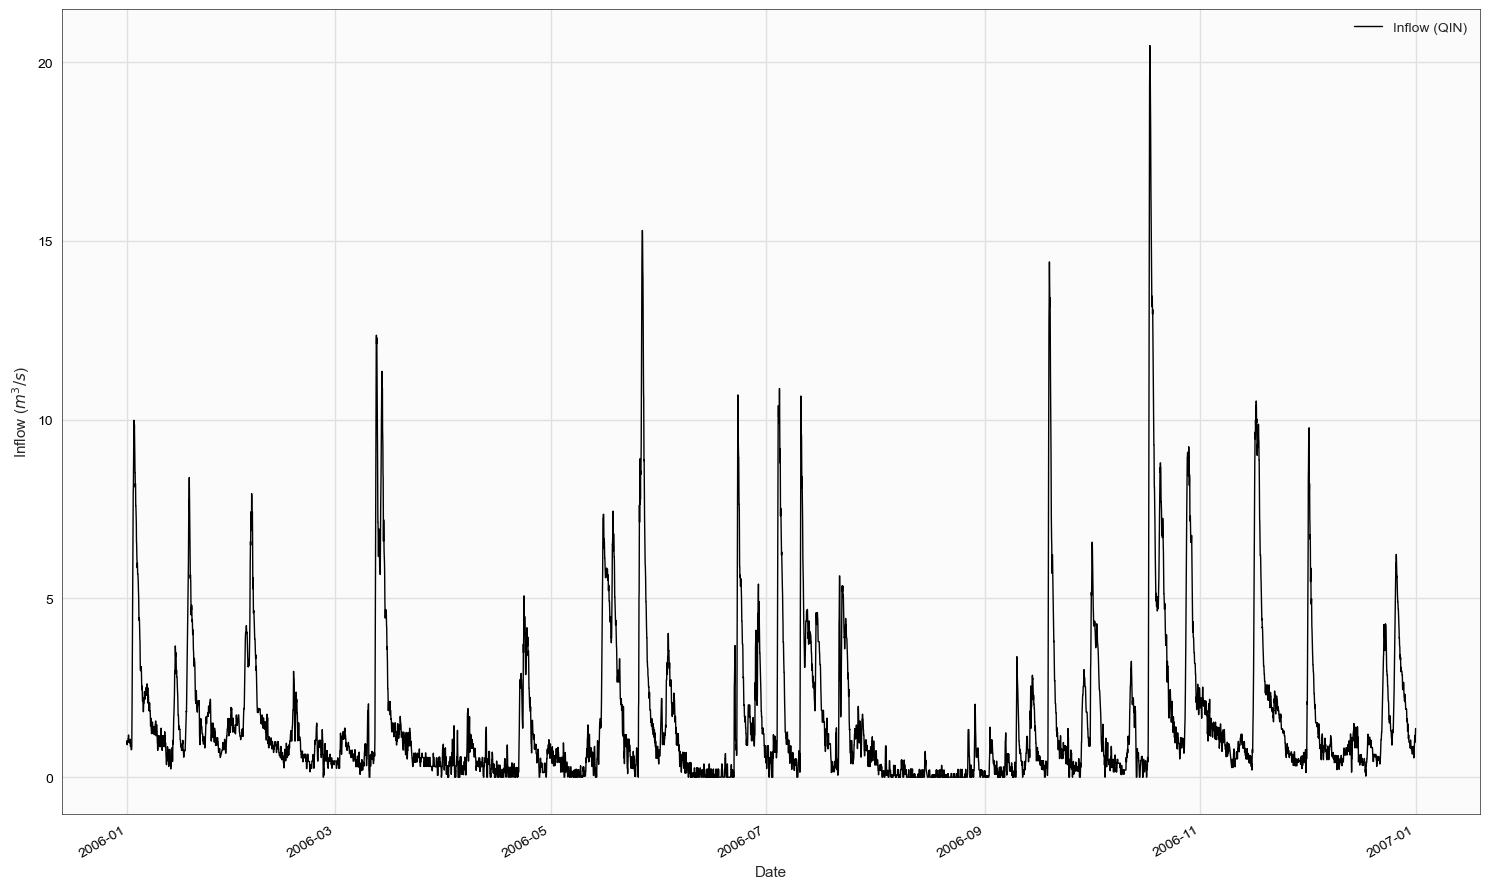

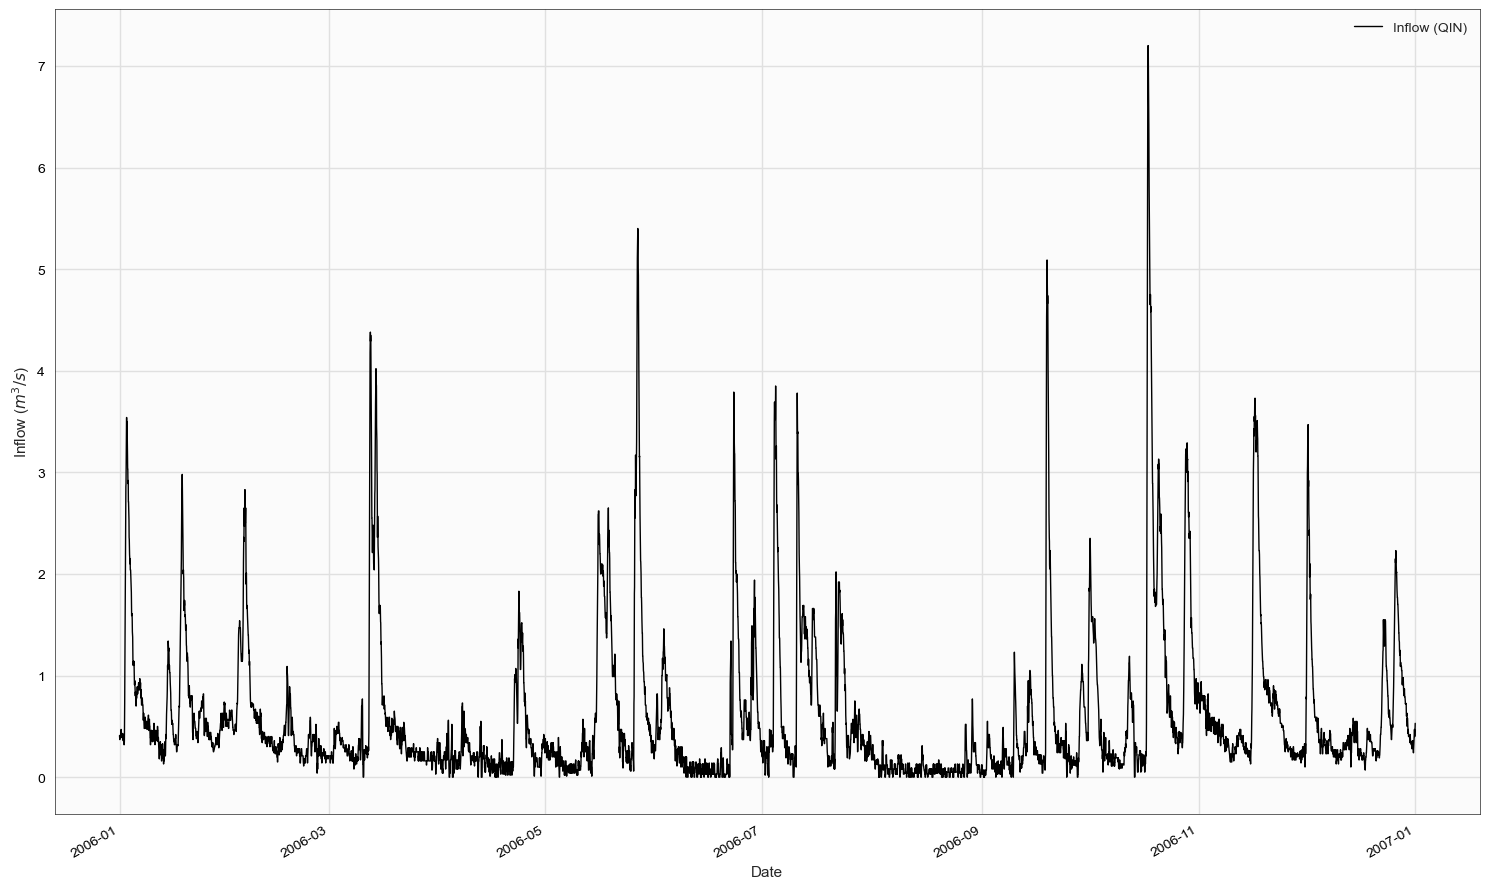

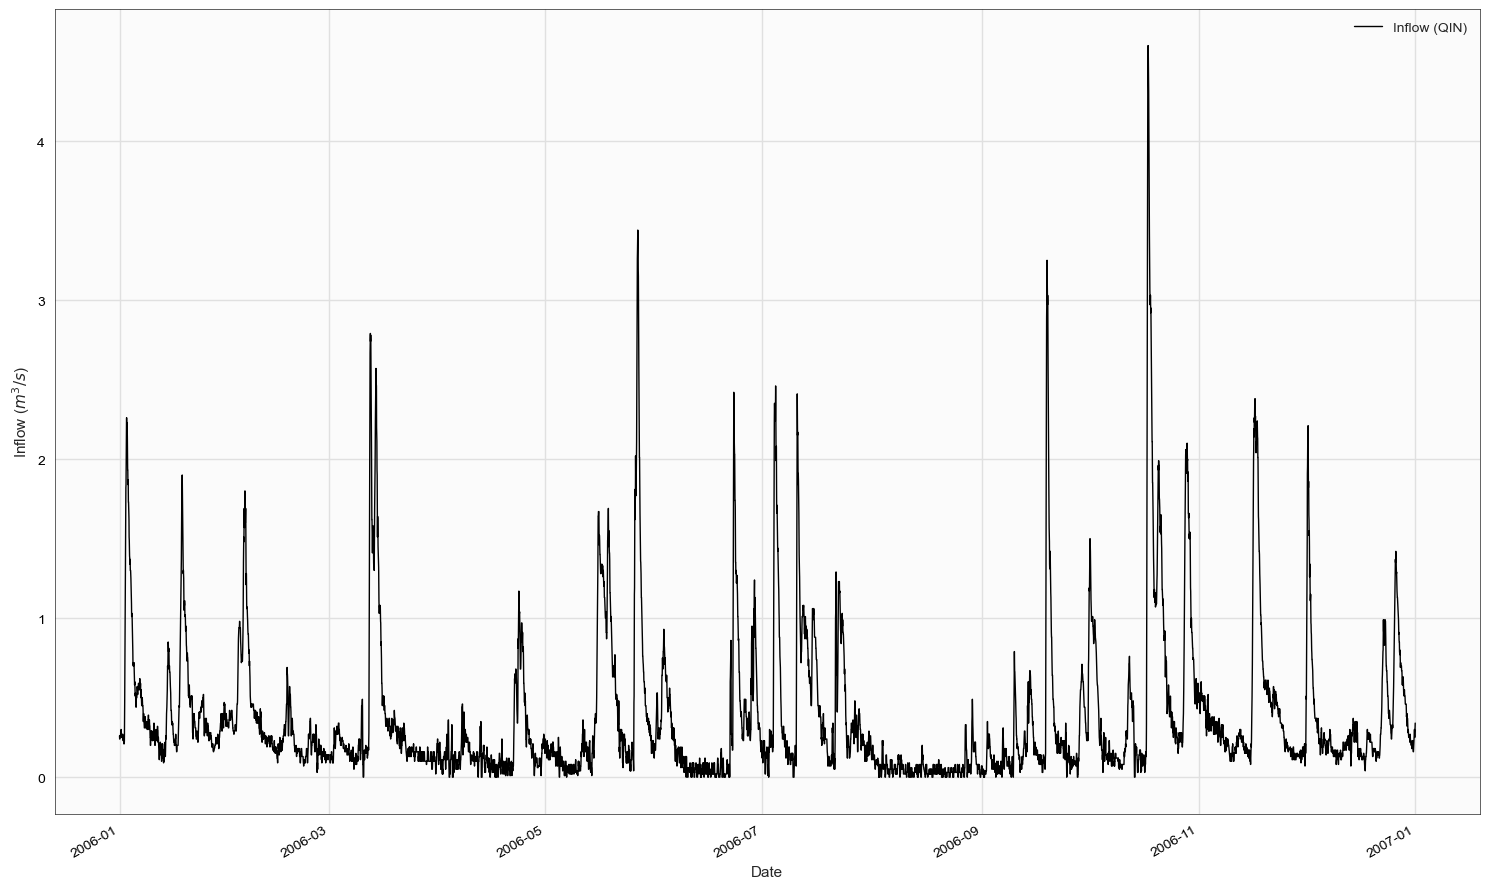

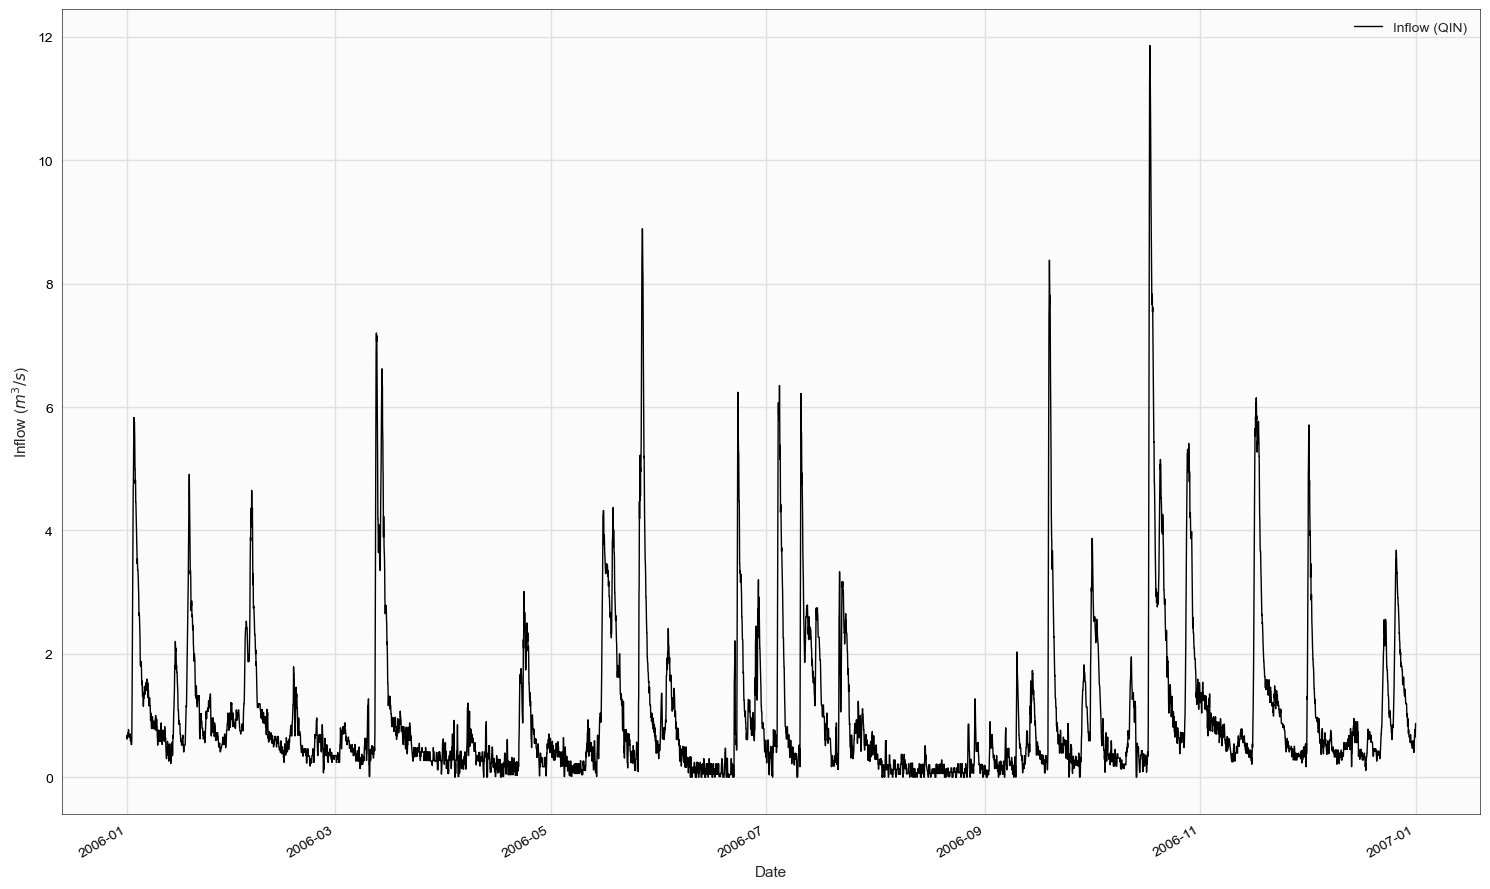

In [6]:
data_columns = ['Inflow (QIN)']

qin_br1 = w2.read(os.path.join(data_path, '2006_DeerCrk_Qin.npt'), 2006, data_columns)
qin_br2 = w2.read(os.path.join(data_path, '2006_WillowCrk_Qin.npt'), 2006, data_columns)
qin_br3 = w2.read(os.path.join(data_path, '2006_IslandCrk_Qin.npt'), 2006, data_columns)
qin_br4 = w2.read(os.path.join(data_path, '2006_MillCrk_Qin.npt'), 2006, data_columns)

display(qin_br1)

ylabel = 'Inflow ($m^3/s$)'
w2.plot(qin_br1, ylabel=ylabel)
w2.plot(qin_br2, ylabel=ylabel)
w2.plot(qin_br3, ylabel=ylabel)
w2.plot(qin_br4, ylabel=ylabel)

# Save data to SQLite database
qin_br1.to_sql('qin_br1', connection, if_exists='replace', index=True)
qin_br2.to_sql('qin_br2', connection, if_exists='replace', index=True)
qin_br3.to_sql('qin_br3', connection, if_exists='replace', index=True)
qin_br4.to_sql('qin_br4', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(qin_br1, 'inputs/qin_br1', 'berlin_2006.h5')
w2.write_hdf(qin_br2, 'inputs/qin_br2', 'berlin_2006.h5')
w2.write_hdf(qin_br3, 'inputs/qin_br3', 'berlin_2006.h5')
w2.write_hdf(qin_br4, 'inputs/qin_br4', 'berlin_2006.h5')

 ## QOT (dam outflows), Berlin Model, 2006

 Two outlets at Berlin Dam

 Input files:
 * BR1: 2006_BerlinDam.npt
 * BR2: 2006_MiltonDam.npt


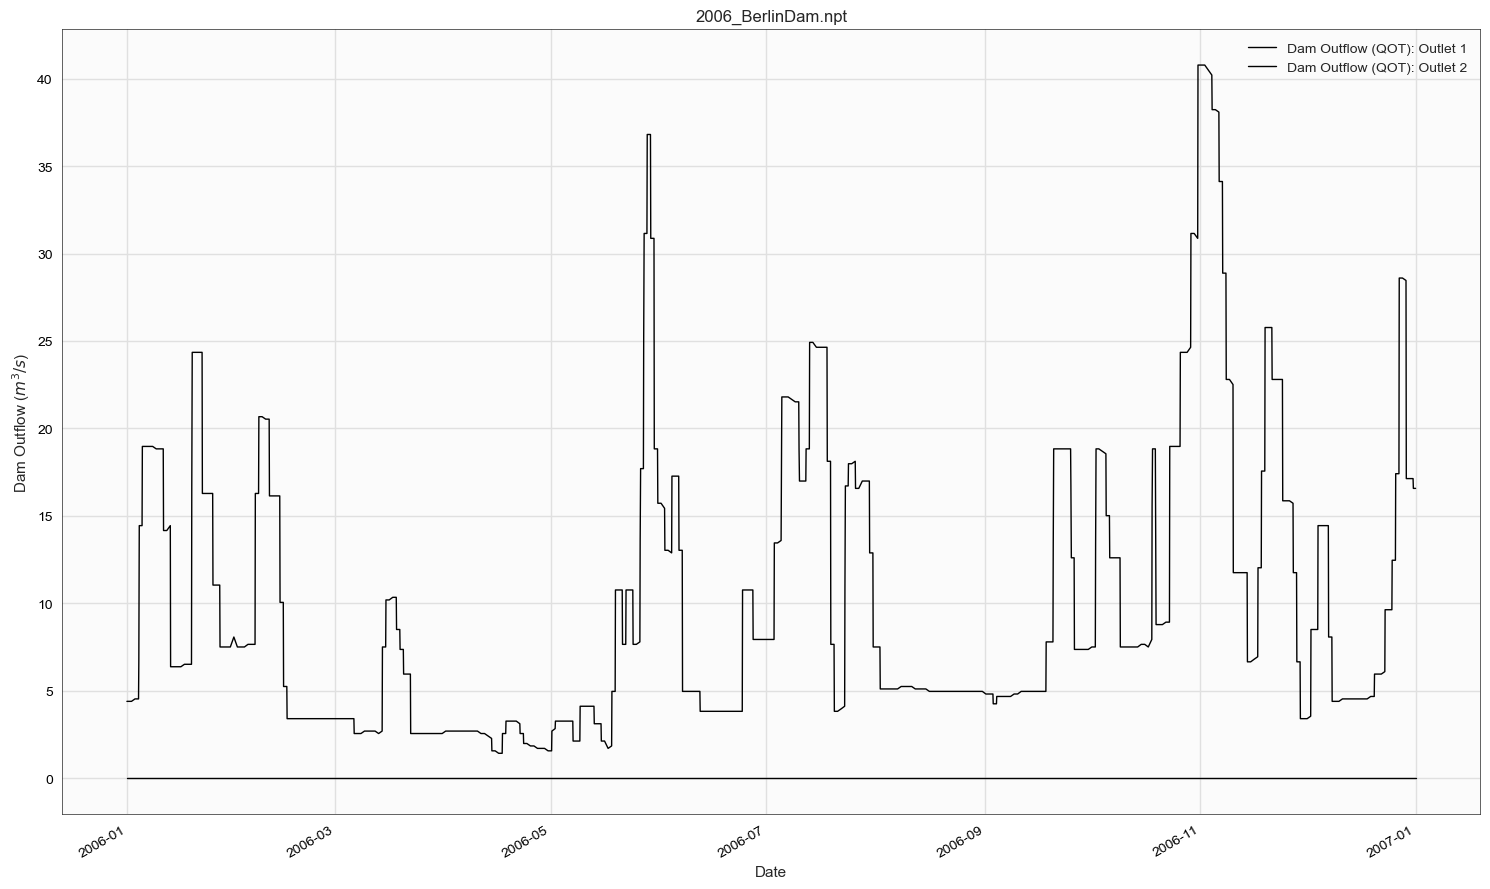

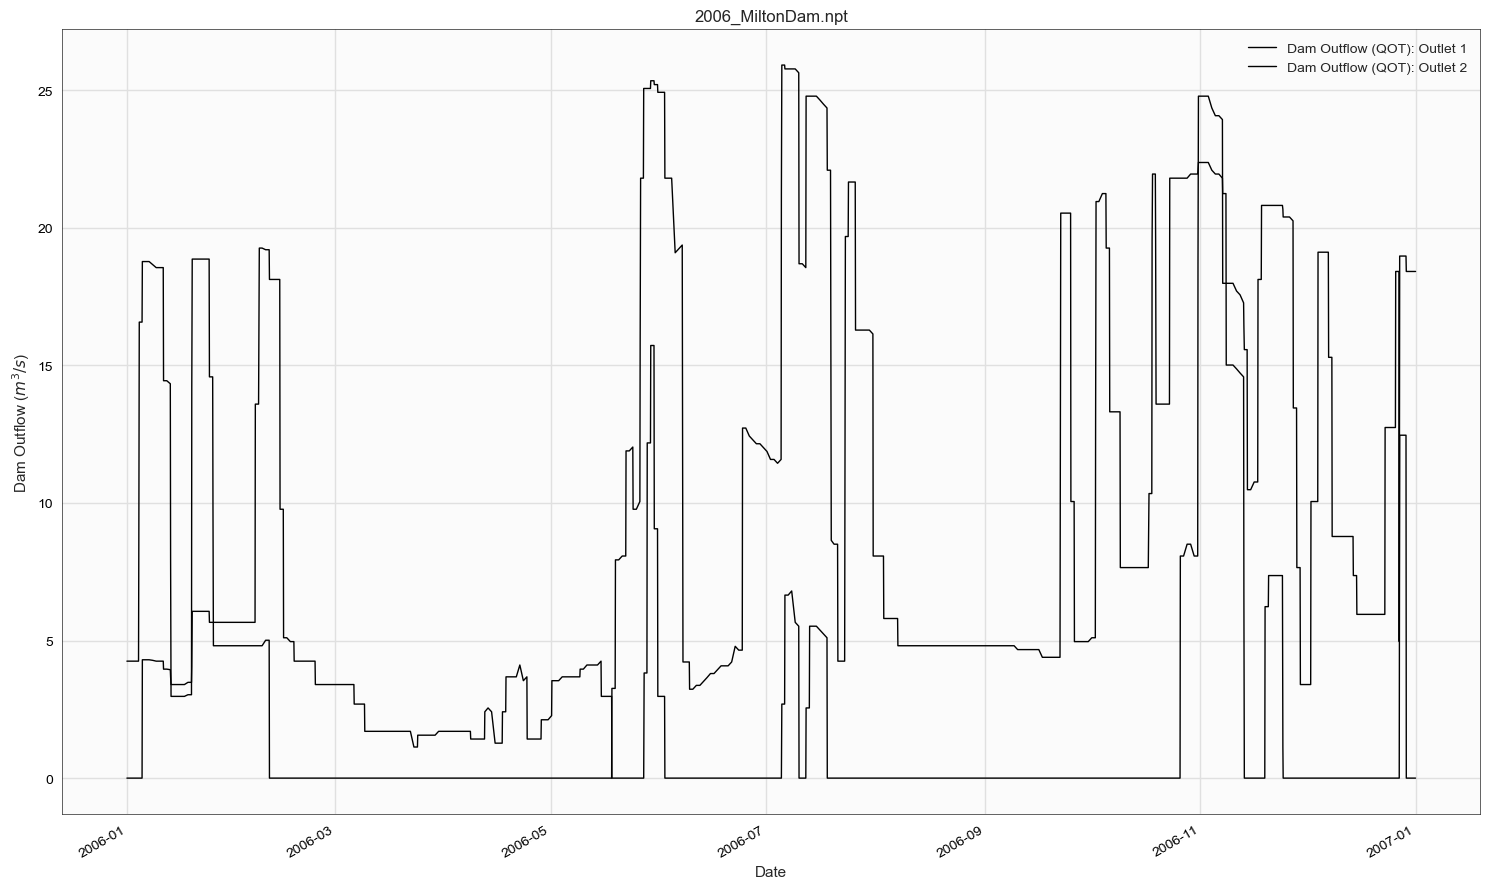

In [7]:
data_columns = ['Dam Outflow (QOT): Outlet 1', 'Dam Outflow (QOT): Outlet 2']

qot_br1 = w2.read(os.path.join(data_path, '2006_BerlinDam.npt'), 2006, data_columns)
qot_br2 = w2.read(os.path.join(data_path, '2006_MiltonDam.npt'), 2006, data_columns)

ylabel = 'Dam Outflow ($m^3/s$)'
w2.plot(qot_br1, title='2006_BerlinDam.npt', ylabel=ylabel)
w2.plot(qot_br2, title='2006_MiltonDam.npt', ylabel=ylabel)

# Save data to SQLite database
qot_br1.to_sql('qot_br1', connection, if_exists='replace', index=True)
qot_br2.to_sql('qot_br2', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(qot_br1, 'inputs/q0t_br1', 'berlin_2006.h5')
w2.write_hdf(qot_br2, 'inputs/q0t_br2', 'berlin_2006.h5')

 ## QTR (tributary inflows), Berlin Model, 2006

 Input files:
 * TR1: 2006_BeechCrk_Qtr.npt
 * TR2: 2006_Alliance_Qtr.npt
 * TR3: 2006_MahoningR_Qtr.npt

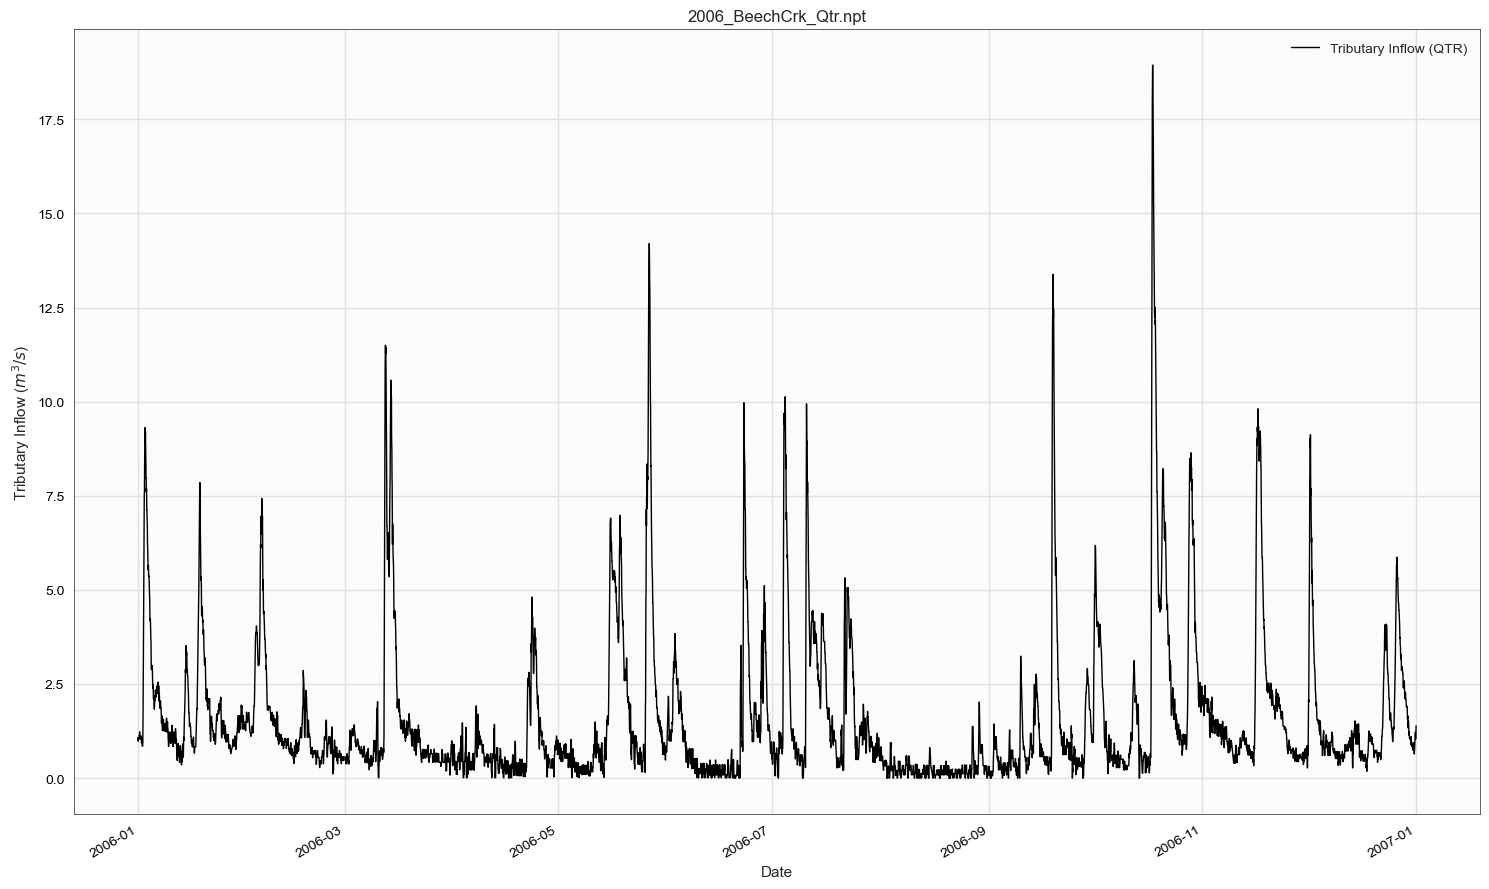

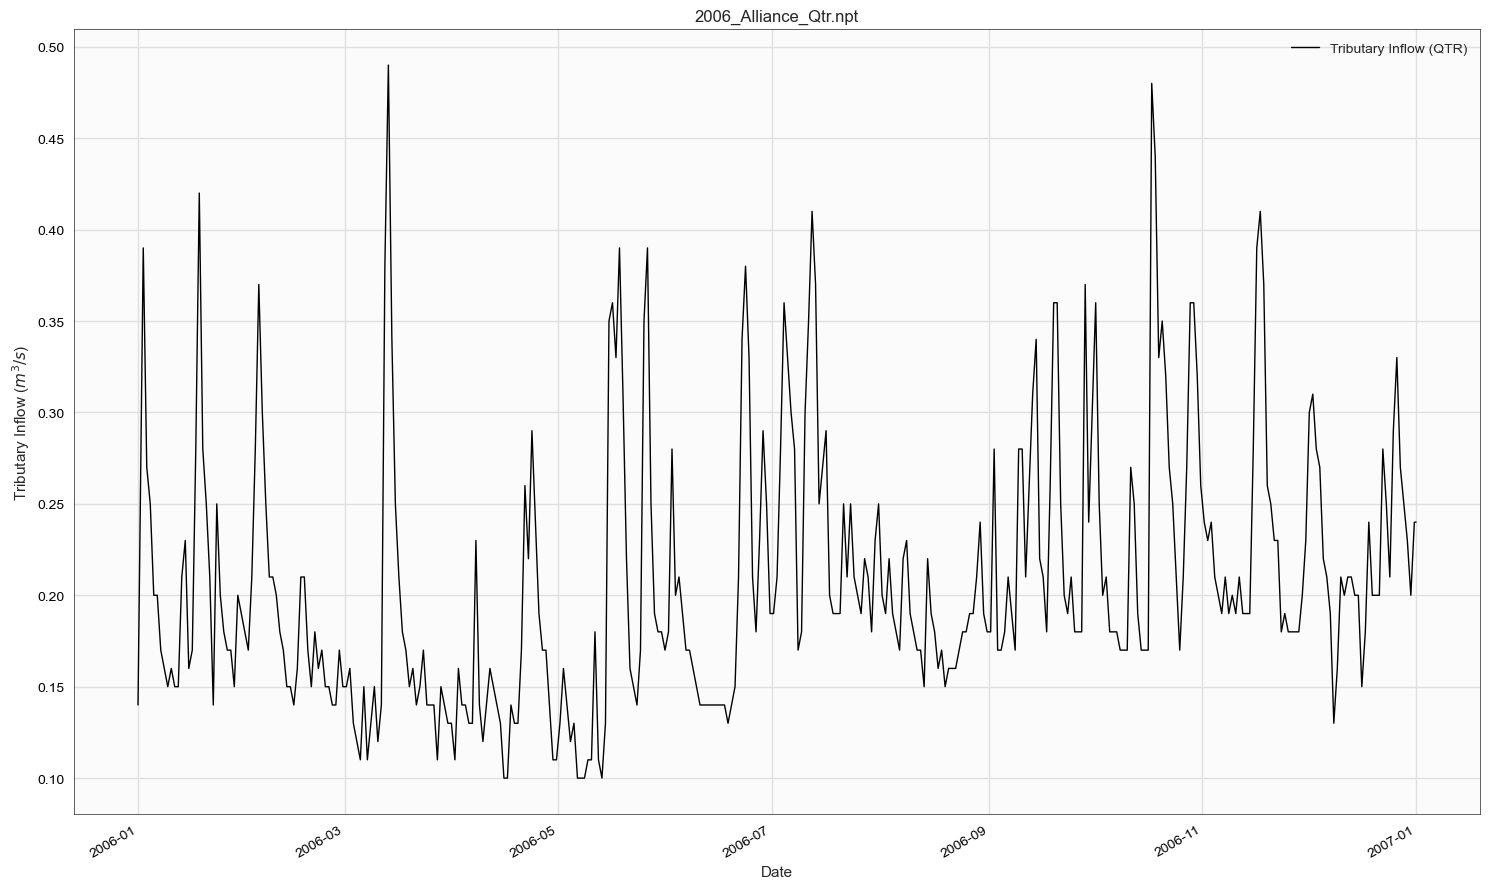

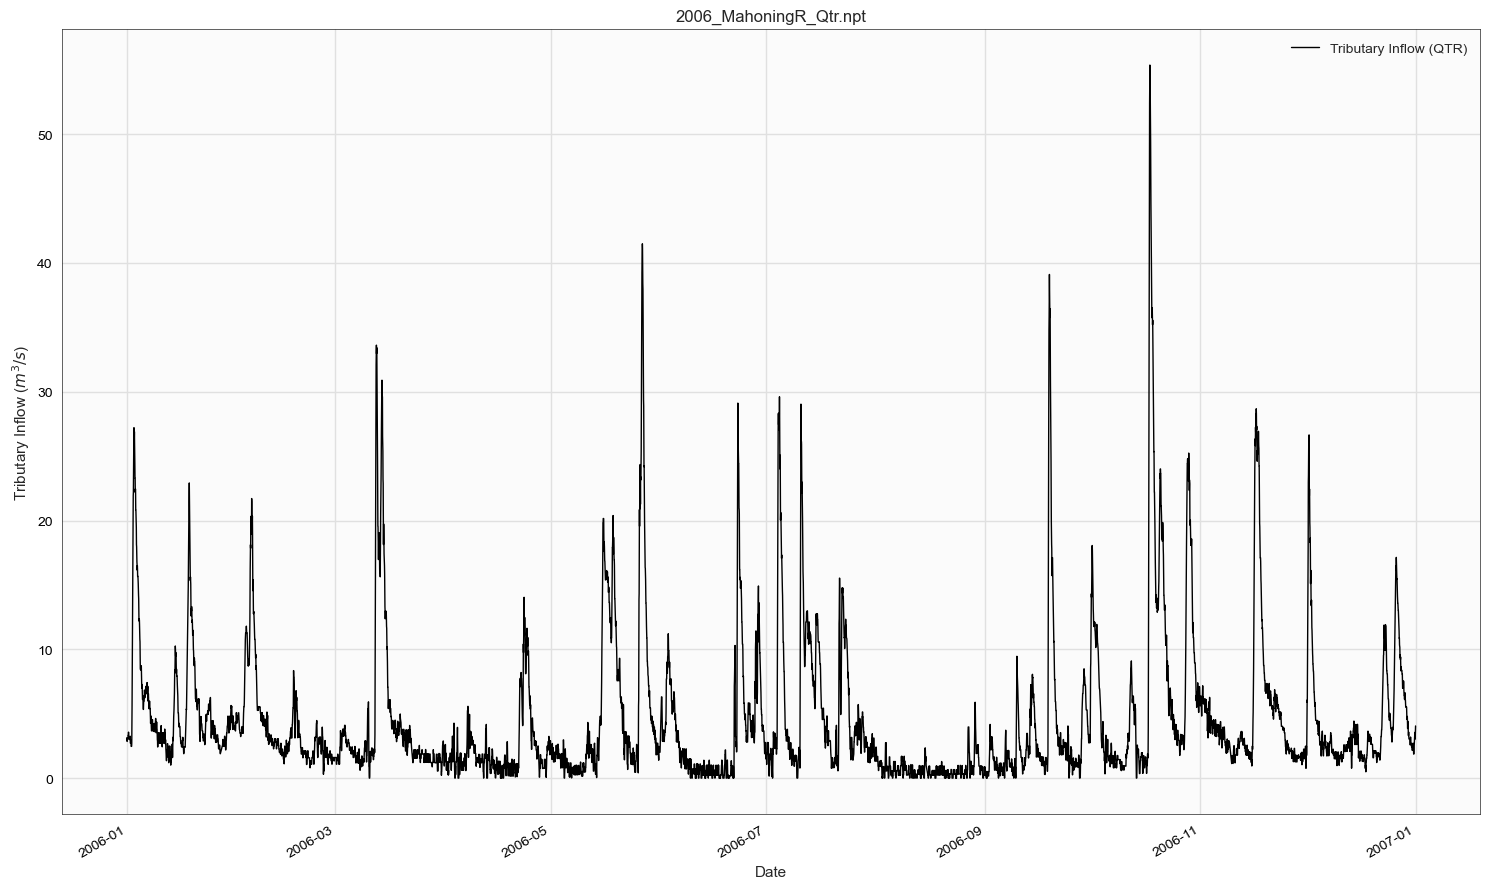

In [8]:
data_columns = ['Tributary Inflow (QTR)']

qtr_tr1 = w2.read(os.path.join(data_path, '2006_BeechCrk_Qtr.npt'), 2006, data_columns)
qtr_tr2 = w2.read(os.path.join(data_path, '2006_Alliance_Qtr.npt'), 2006, data_columns)
qtr_tr3 = w2.read(os.path.join(data_path, '2006_MahoningR_Qtr.npt'), 2006, data_columns)

ylabel = 'Tributary Inflow ($m^3/s$)'
w2.plot(qtr_tr1, title='2006_BeechCrk_Qtr.npt', ylabel=ylabel)
w2.plot(qtr_tr2, title='2006_Alliance_Qtr.npt', ylabel=ylabel)
w2.plot(qtr_tr3, title='2006_MahoningR_Qtr.npt', ylabel=ylabel)

# Save data to SQLite database
qtr_tr1.to_sql('qtr_tr1', connection, if_exists='replace', index=True)
qtr_tr2.to_sql('qtr_tr2', connection, if_exists='replace', index=True)
qtr_tr3.to_sql('qtr_tr3', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(qtr_tr1, 'inputs/qtr_tr1', 'berlin_2006.h5')
w2.write_hdf(qtr_tr2, 'inputs/qtr_tr2', 'berlin_2006.h5')
w2.write_hdf(qtr_tr3, 'inputs/qtr_tr3', 'berlin_2006.h5')

 ## TTR (tributary inflow temperature), Berlin Model, 2006

 Input files:
 * TR1: 2006_MahoningR_Ttr5.npt
 * TR2: 2006_Alliance_Ttr.npt
 * TR3: 2006_MahoningR_Ttr.npt

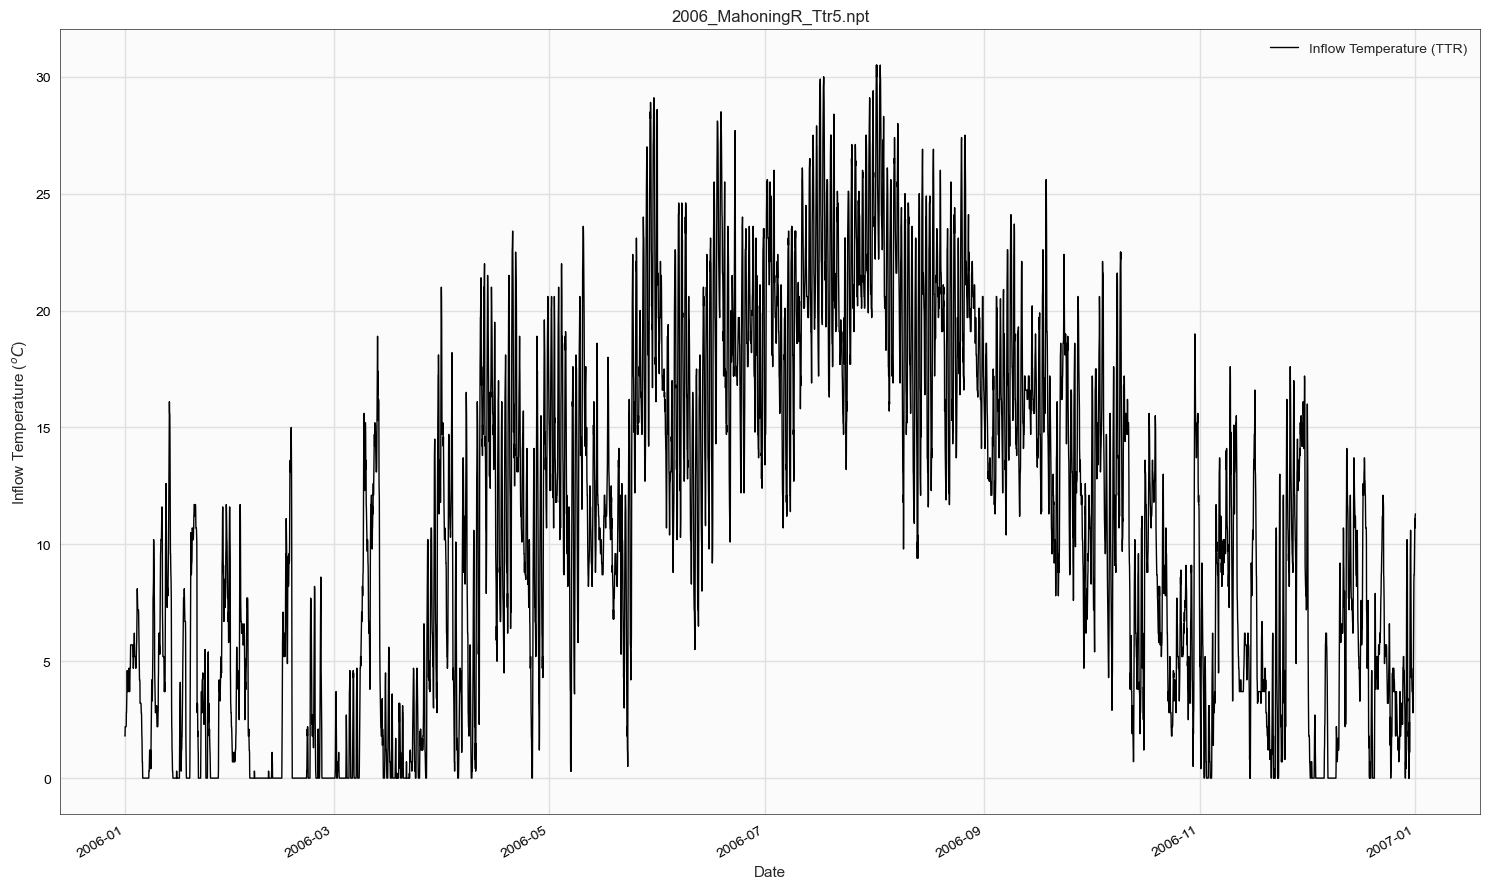

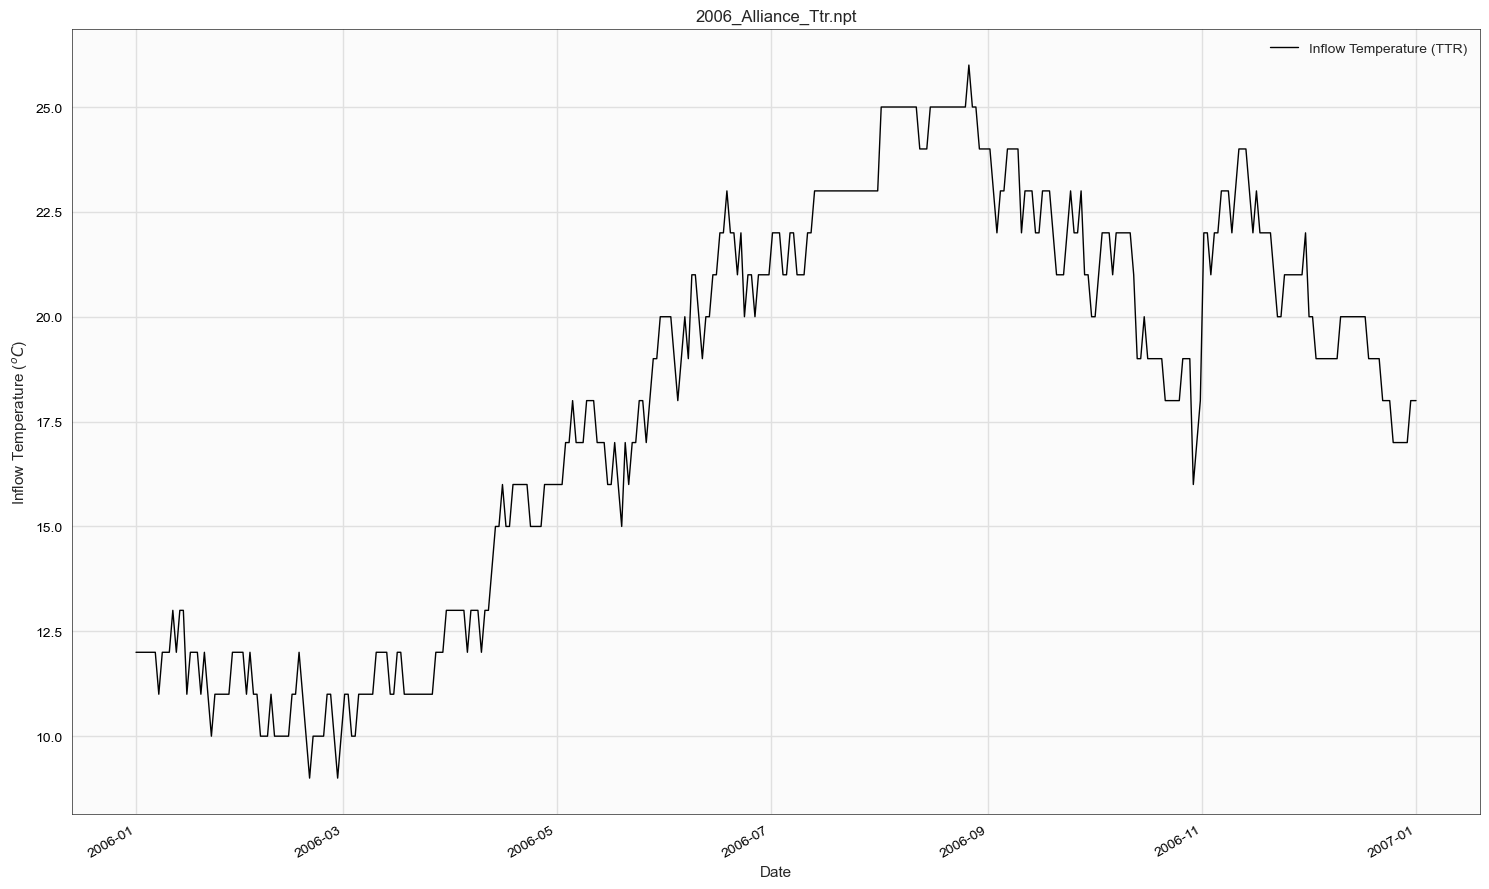

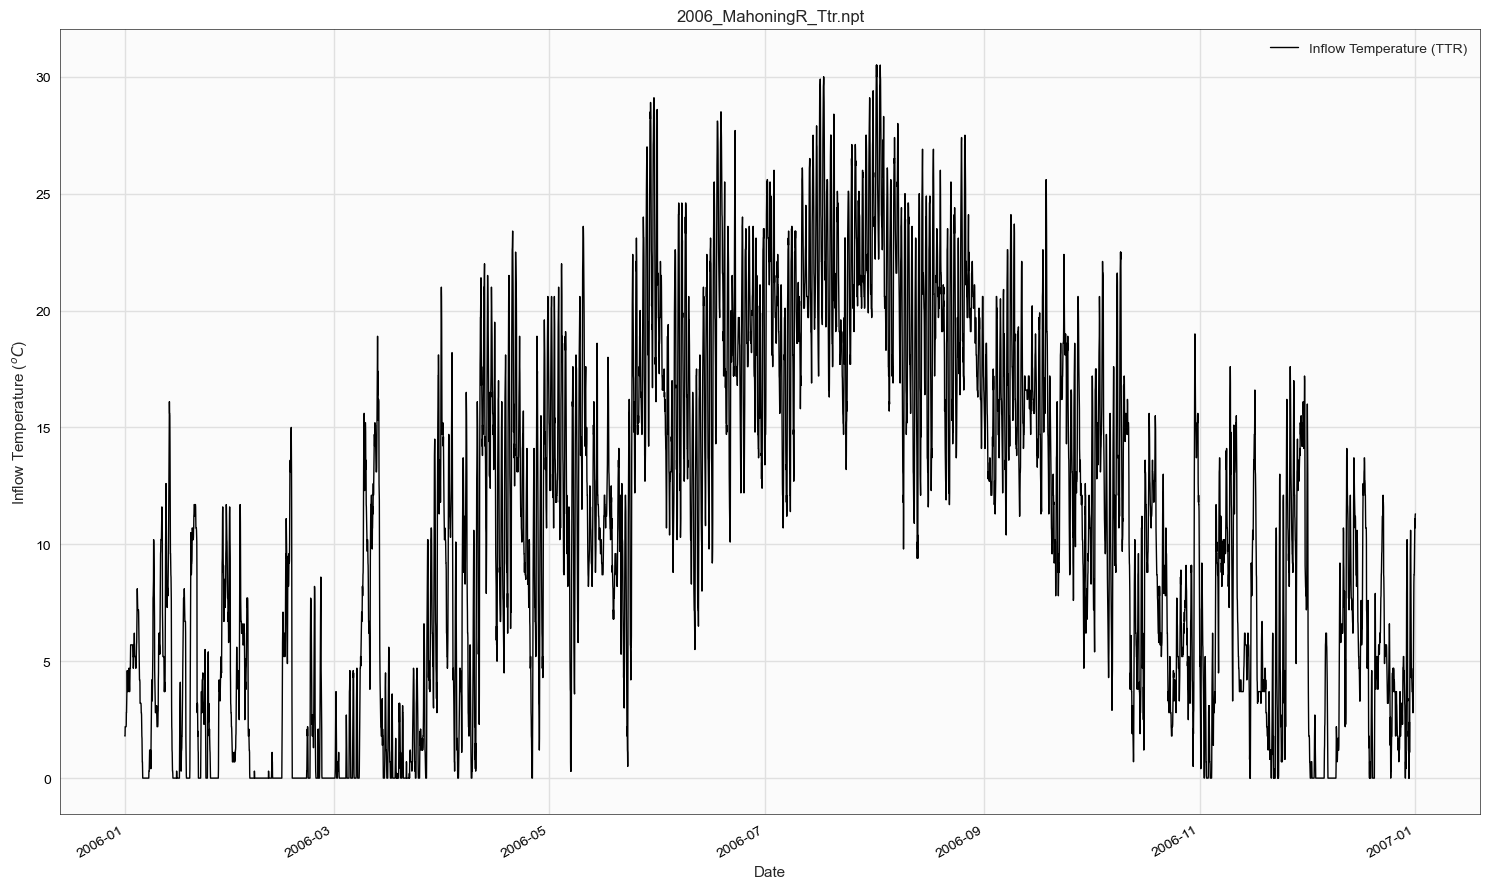

In [9]:
data_columns = ['Inflow Temperature (TTR)']

ttr_tr1 = w2.read(os.path.join(data_path, '2006_MahoningR_Ttr5.npt'), 2006, data_columns)
ttr_tr2 = w2.read(os.path.join(data_path, '2006_Alliance_Ttr.npt'), 2006, data_columns)
ttr_tr3 = w2.read(os.path.join(data_path, '2006_MahoningR_Ttr.npt'), 2006, data_columns)

ylabel = 'Inflow Temperature ($^oC$)'
w2.plot(ttr_tr1, title='2006_MahoningR_Ttr5.npt', ylabel=ylabel)
w2.plot(ttr_tr2, title='2006_Alliance_Ttr.npt', ylabel=ylabel)
w2.plot(ttr_tr3, title='2006_MahoningR_Ttr.npt', ylabel=ylabel)

# Save data to SQLite database
ttr_tr1.to_sql('ttr_tr1', connection, if_exists='replace', index=True)
ttr_tr2.to_sql('ttr_tr2', connection, if_exists='replace', index=True)
ttr_tr3.to_sql('ttr_tr3', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(ttr_tr1, 'inputs/ttr_tr1', 'berlin_2006.h5')
w2.write_hdf(ttr_tr2, 'inputs/ttr_tr2', 'berlin_2006.h5')
w2.write_hdf(ttr_tr3, 'inputs/ttr_tr3', 'berlin_2006.h5')

 ## CTR (tributary constituent inflow concentrations), Berlin Model, 2006

 Input files:
 * TR1: 2006_MahoningR_Ctr1.npt
 * TR2: 2006_AllianceWwtp_Ctr.npt
 * TR3: 2006_MahoningR_Ctr.npt

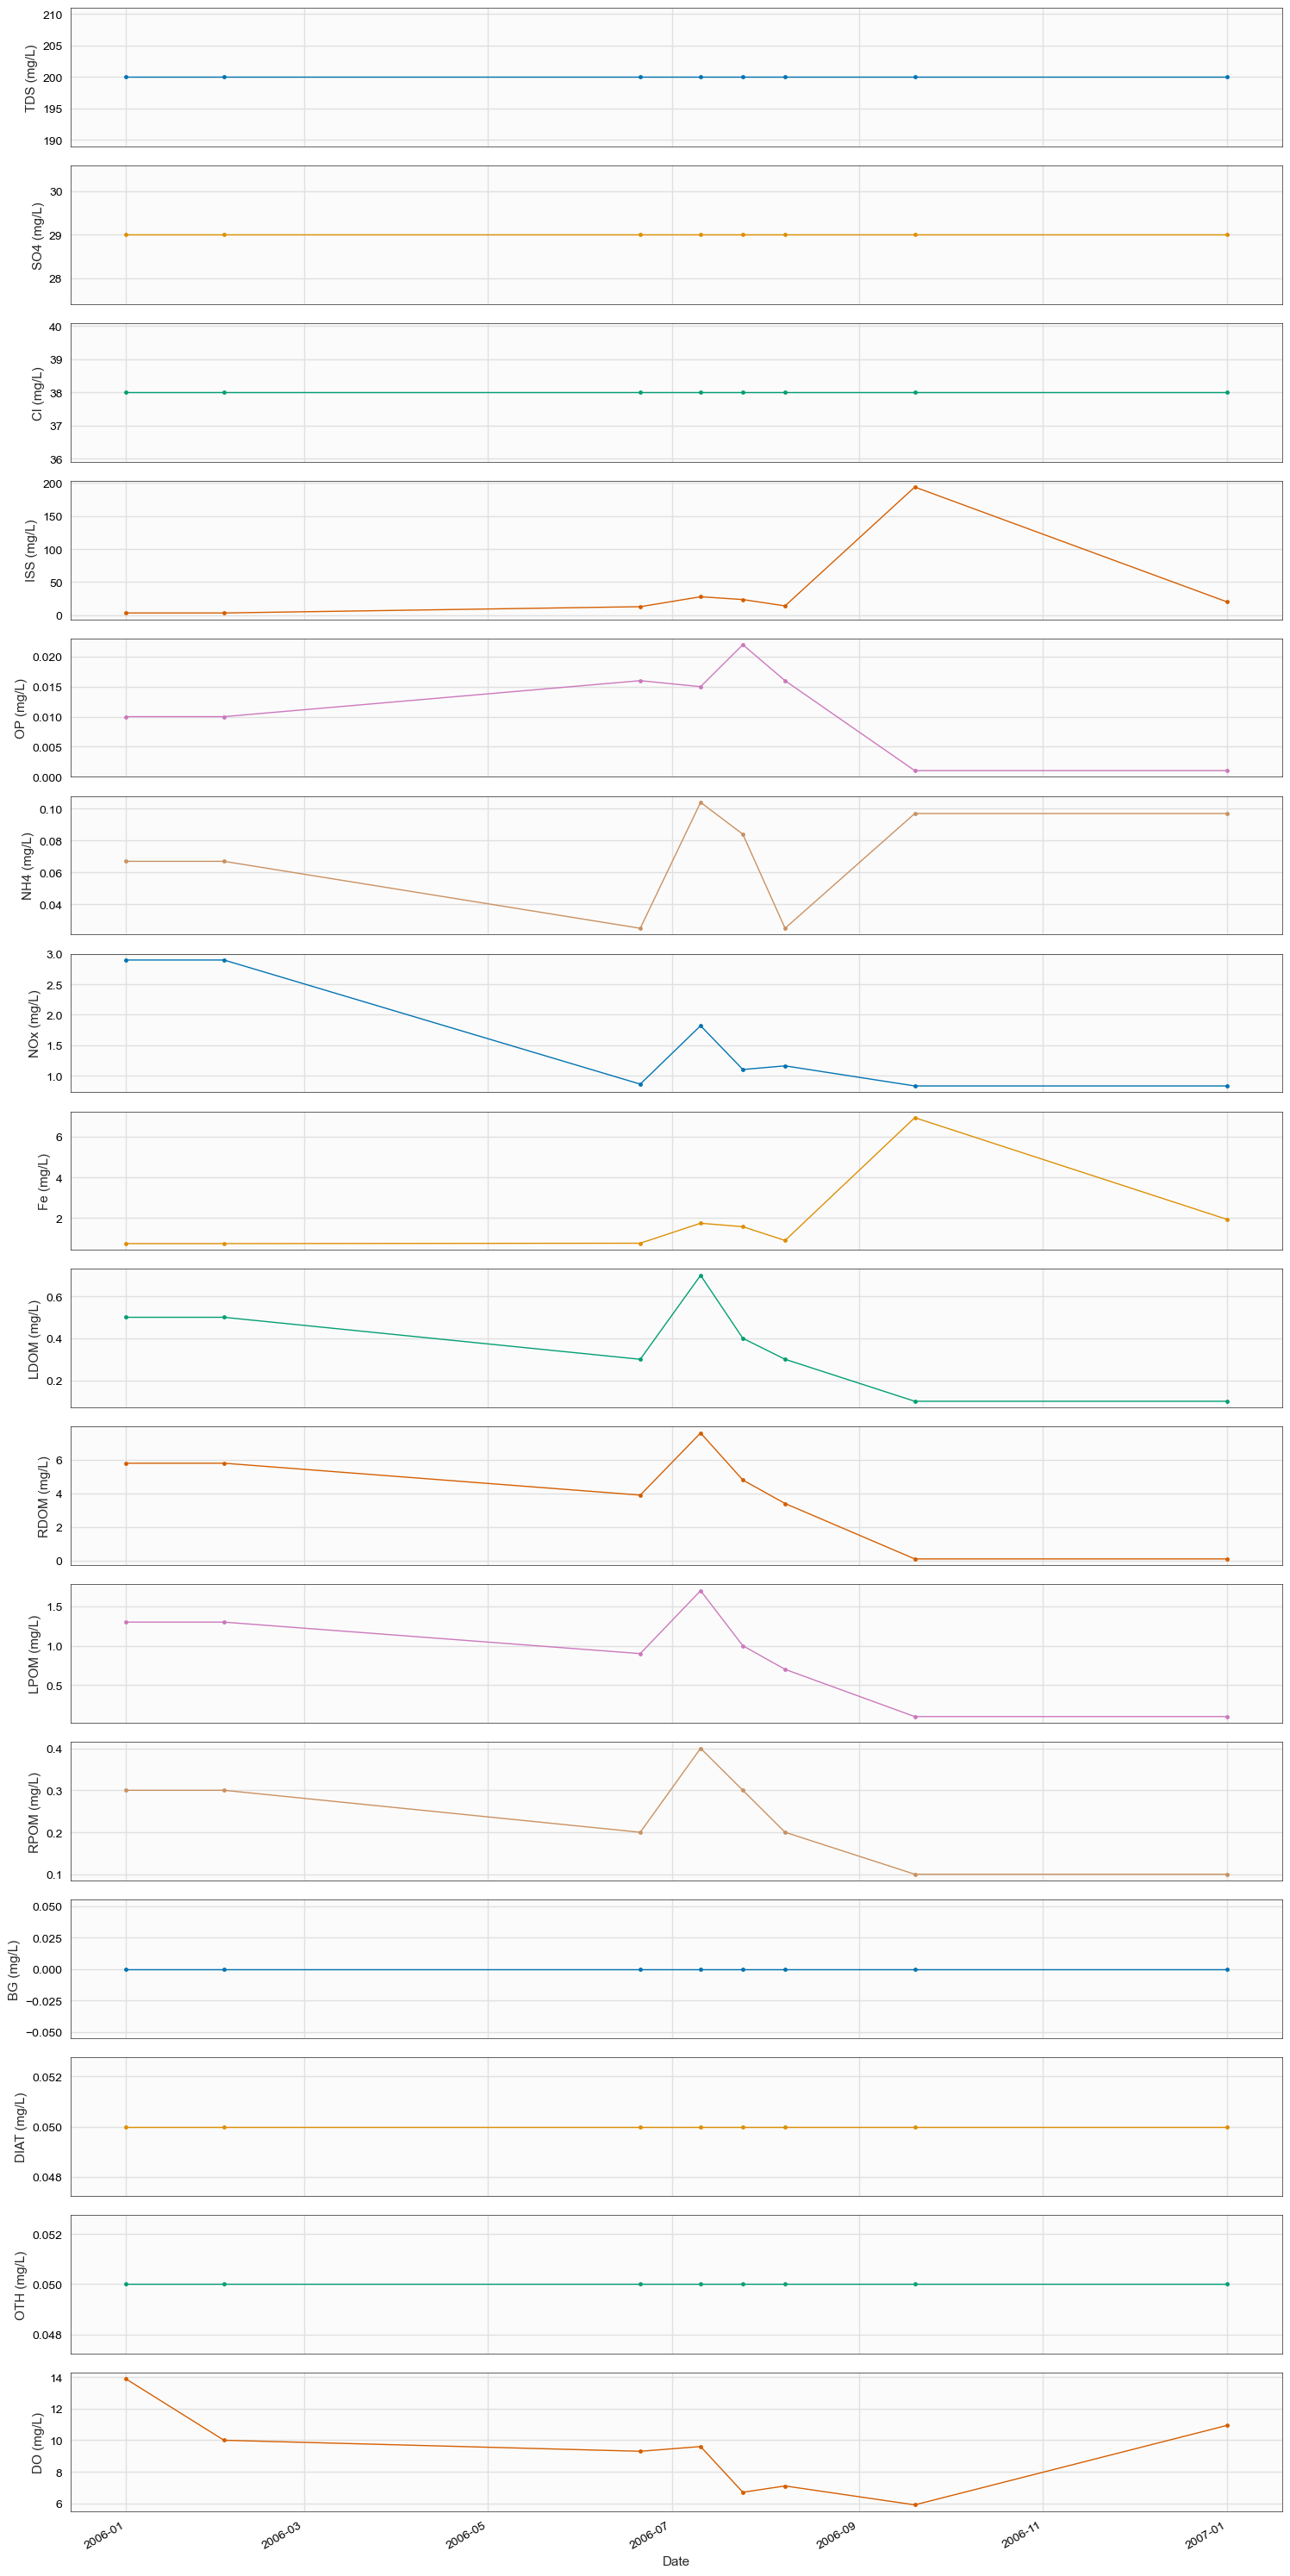

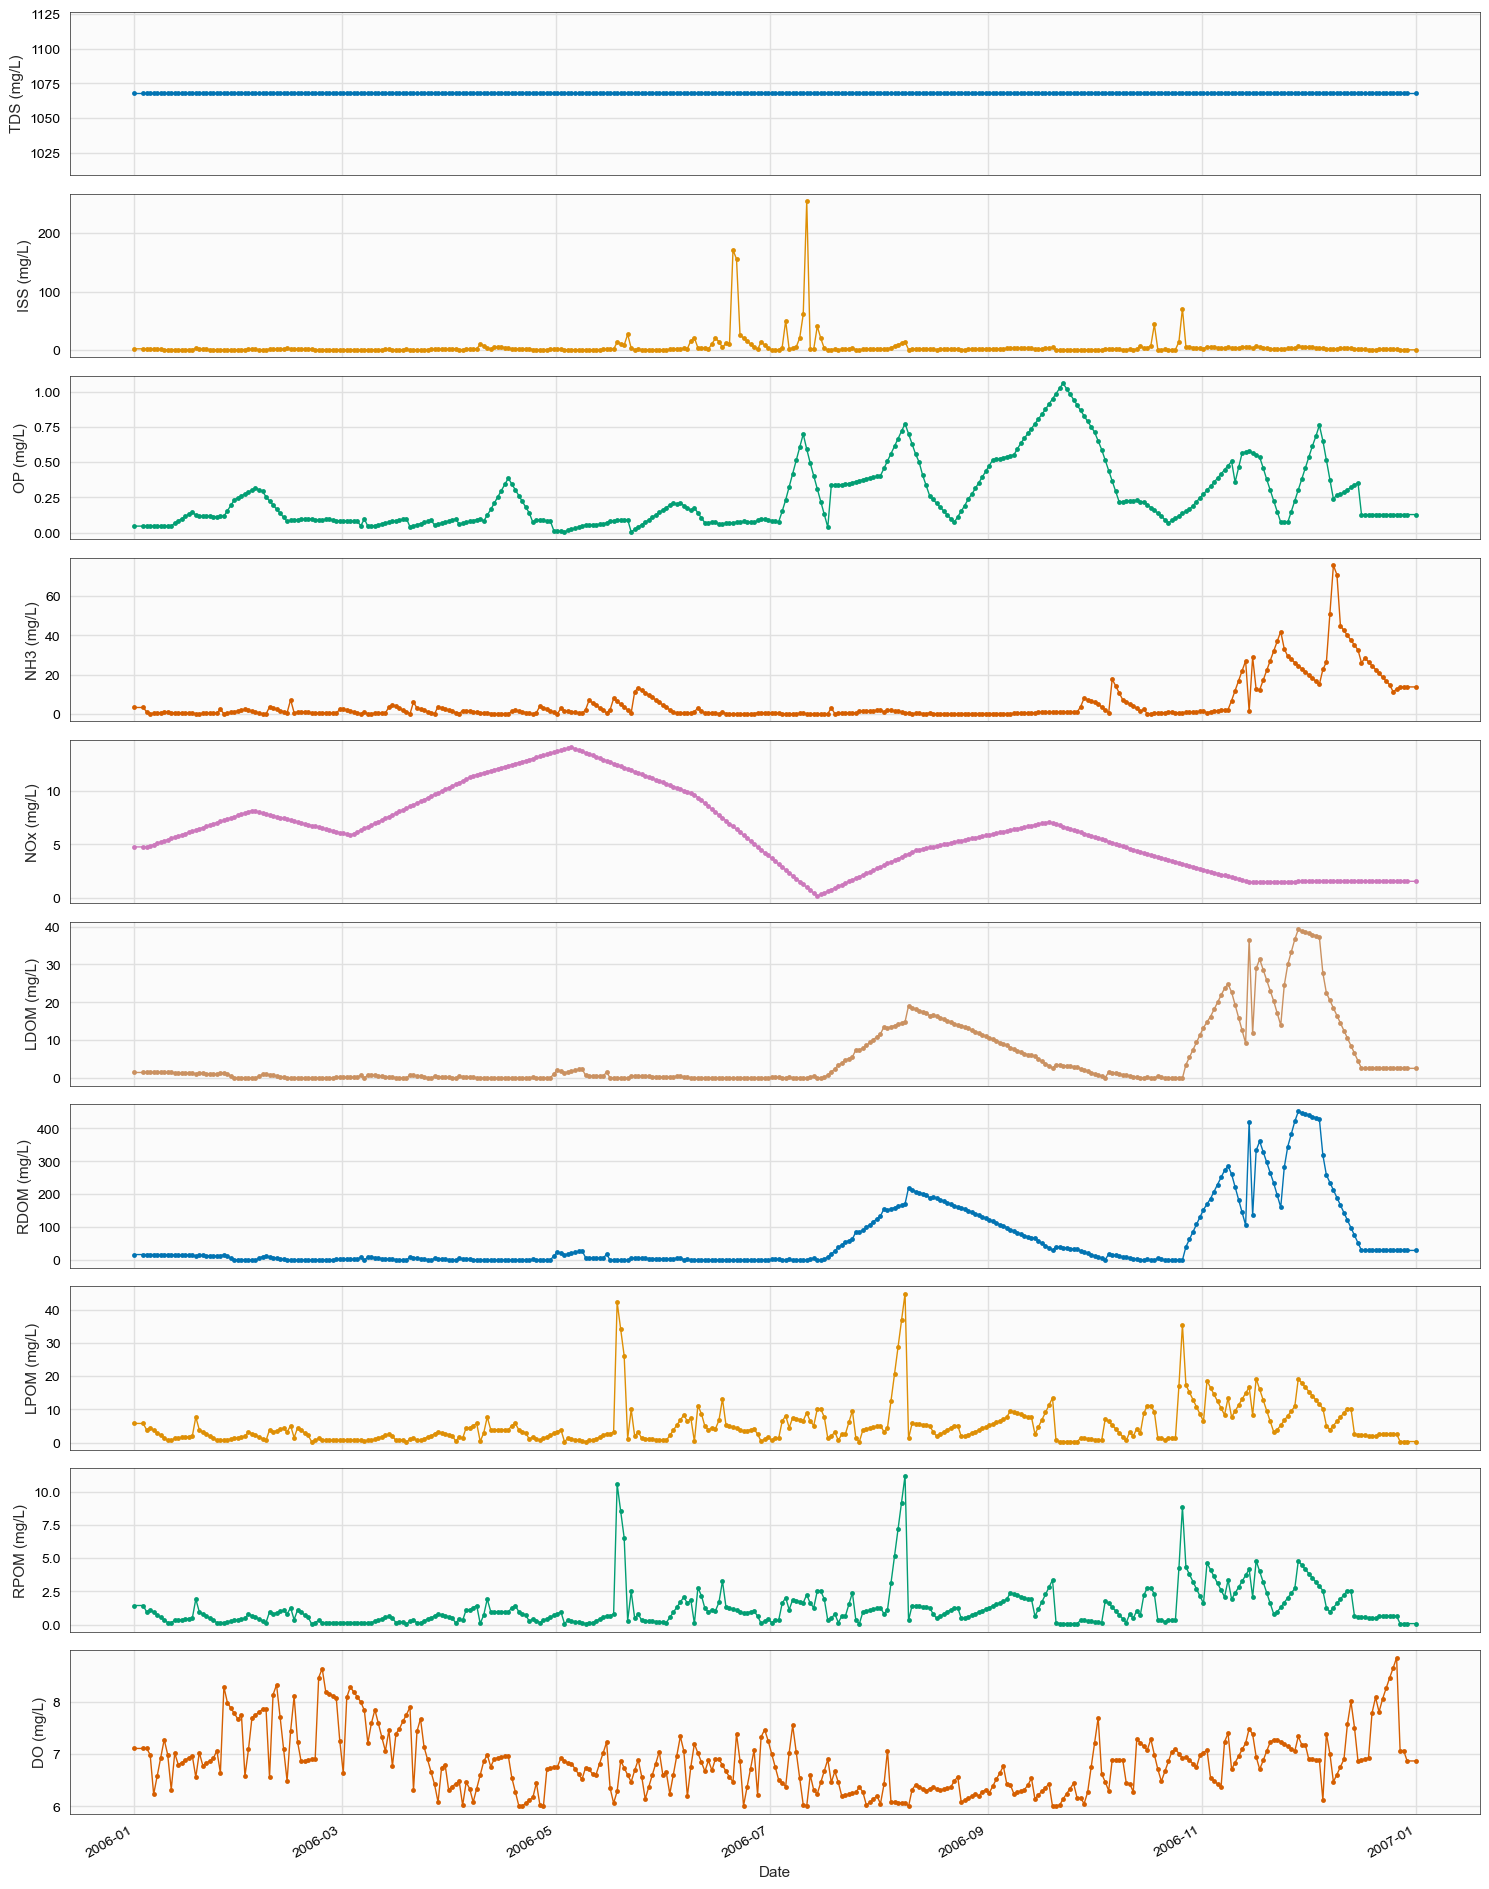

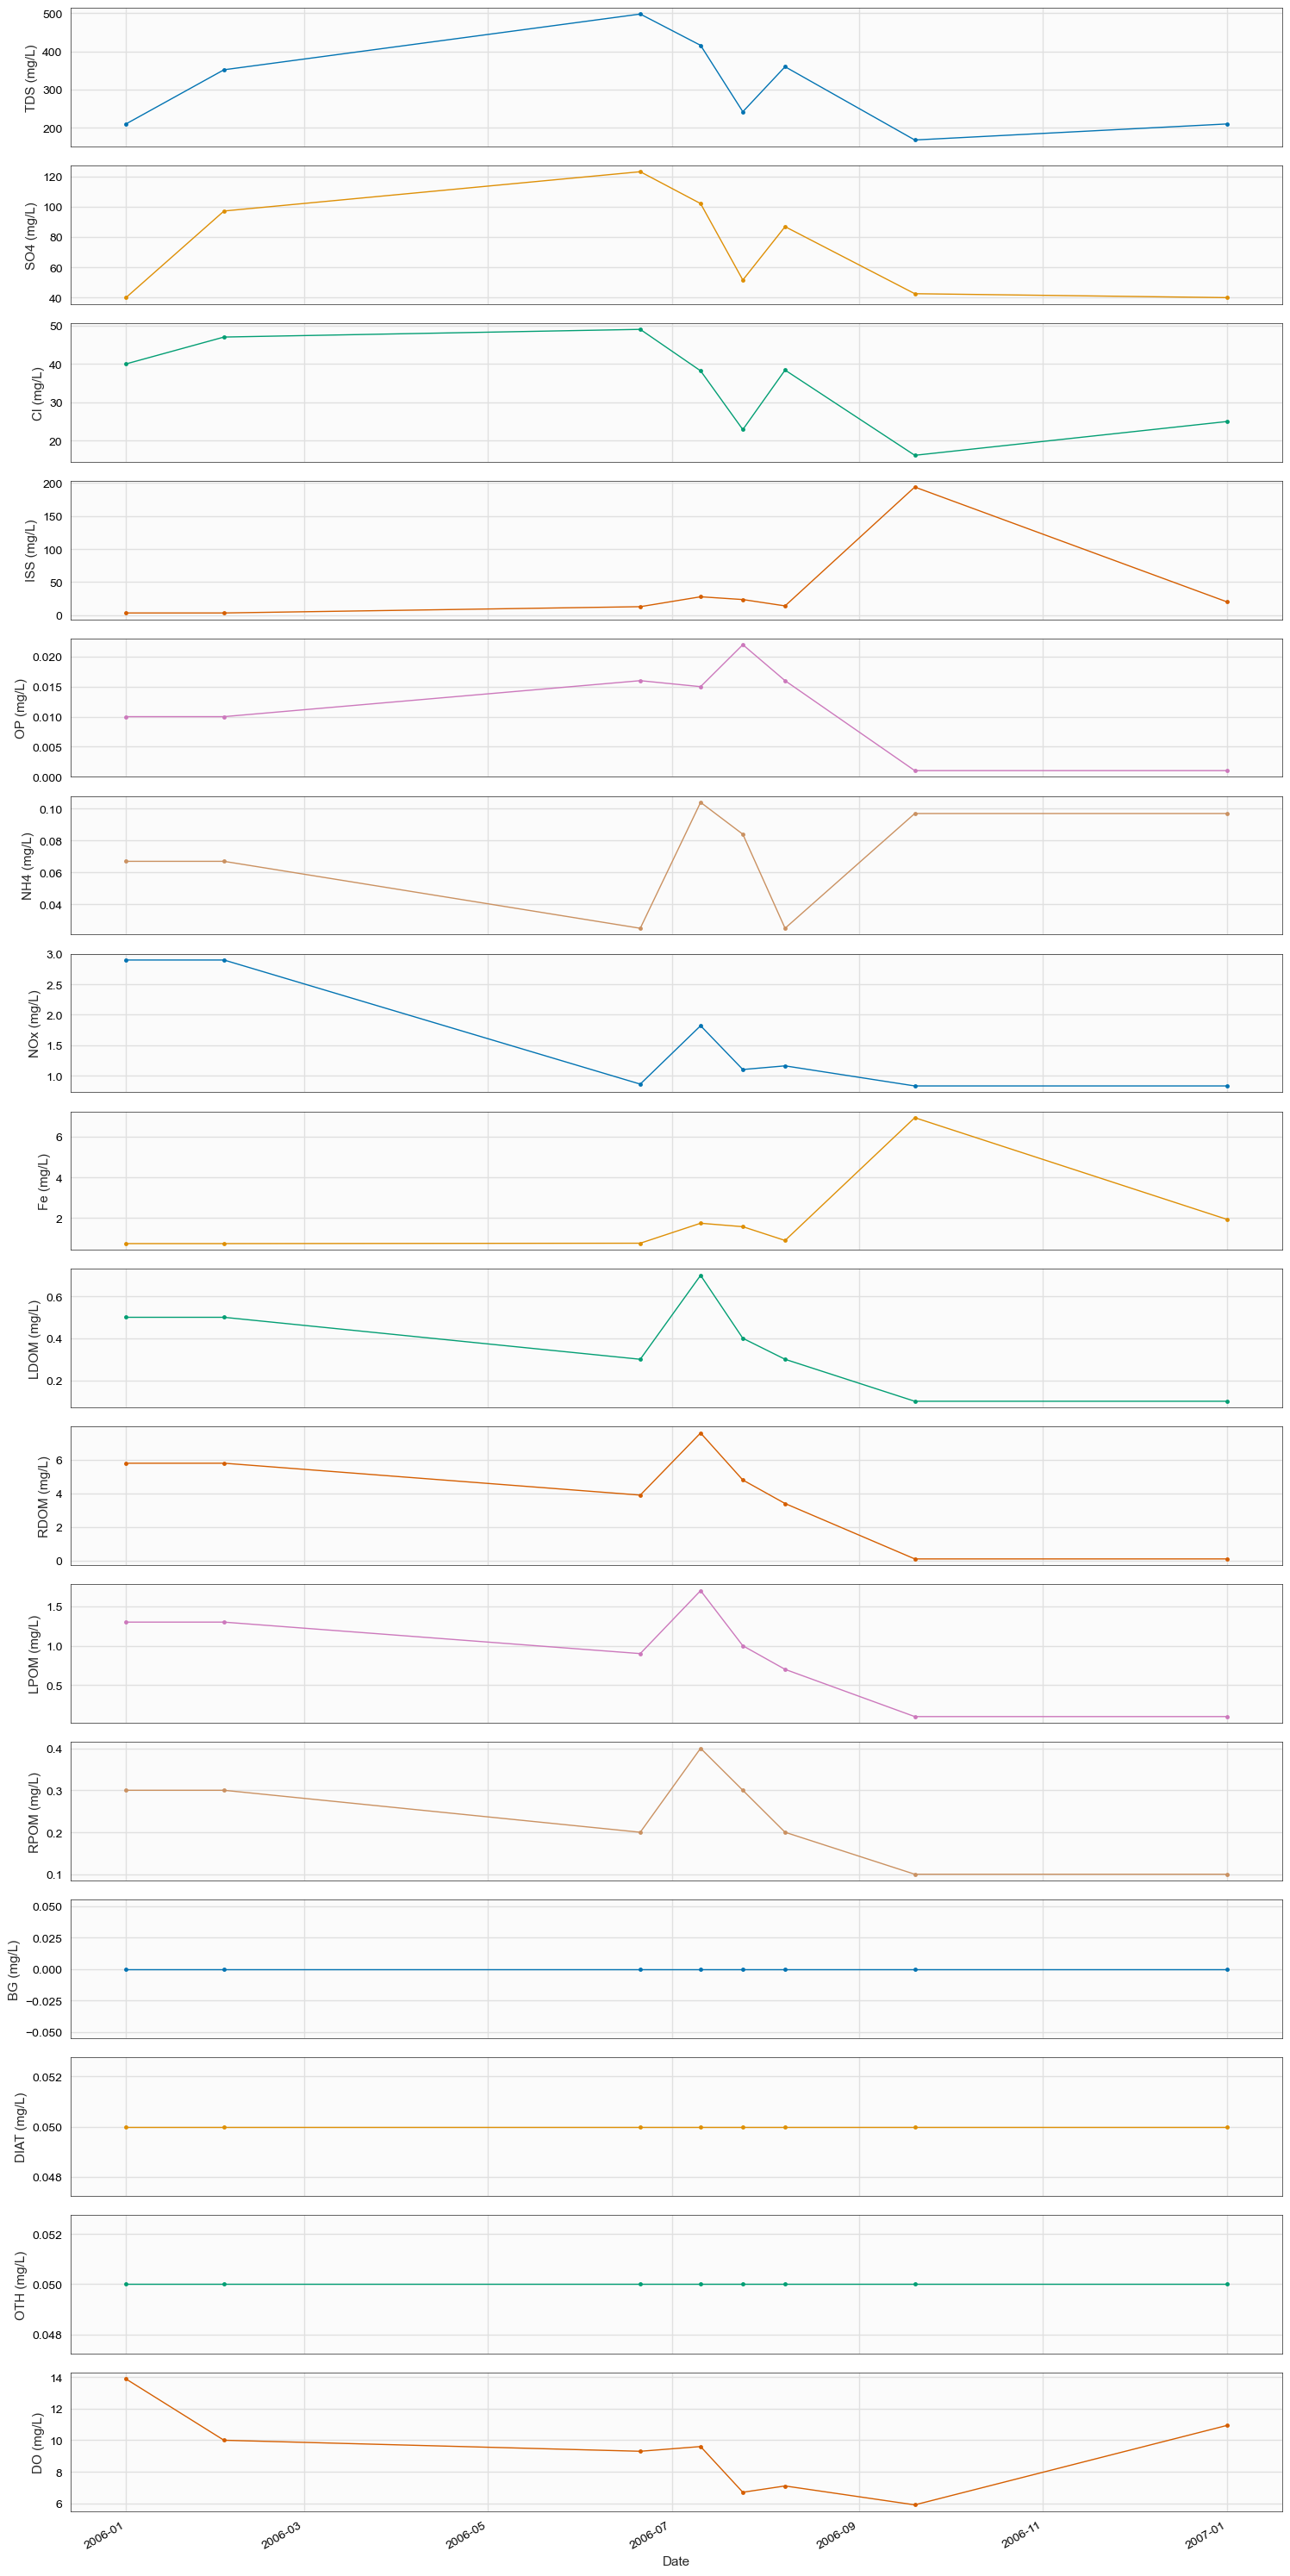

In [10]:
infiles = [
    '2006_MahoningR_Ctr1.npt',
    '2006_AllianceWwtp_Ctr.npt',
    '2006_MahoningR_Ctr.npt'
]

ctr1_vars = ['TDS', 'SO4', 'Cl', 'ISS', 'OP', 'NH4', 'NOx', 'Fe',
             'LDOM', 'RDOM', 'LPOM', 'RPOM', 'BG', 'DIAT', 'OTH', 'DO']
ctr2_vars = ['TDS', 'ISS', 'OP', 'NH3', 'NOx', 'LDOM', 'RDOM', 'LPOM', 'RPOM', 'DO']
ctr3_vars = ['TDS', 'SO4', 'Cl', 'ISS', 'OP', 'NH4', 'NOx', 'Fe',
             'LDOM', 'RDOM', 'LPOM', 'RPOM', 'BG', 'DIAT', 'OTH', 'DO']

ctr1_ylabels = [
    'TDS (mg/L)', 'SO4 (mg/L)', 'Cl (mg/L)', 'ISS (mg/L)', 'OP (mg/L)', 'NH4 (mg/L)', 'NOx (mg/L)', 'Fe (mg/L)',
    'LDOM (mg/L)', 'RDOM (mg/L)', 'LPOM (mg/L)', 'RPOM (mg/L)', 'BG (mg/L)', 'DIAT (mg/L)', 'OTH (mg/L)', 'DO (mg/L)']

ctr2_ylabels = ['TDS (mg/L)', 'ISS (mg/L)', 'OP (mg/L)', 'NH3 (mg/L)', 'NOx (mg/L)',
                'LDOM (mg/L)', 'RDOM (mg/L)', 'LPOM (mg/L)', 'RPOM (mg/L)', 'DO (mg/L)']
ctr3_ylabels = [
    'TDS (mg/L)', 'SO4 (mg/L)', 'Cl (mg/L)', 'ISS (mg/L)', 'OP (mg/L)', 'NH4 (mg/L)', 'NOx (mg/L)', 'Fe (mg/L)',
    'LDOM (mg/L)', 'RDOM (mg/L)', 'LPOM (mg/L)', 'RPOM (mg/L)', 'BG (mg/L)', 'DIAT (mg/L)', 'OTH (mg/L)', 'DO (mg/L)']

ctr1 = w2.read(os.path.join(data_path, f'2006_MahoningR_Ctr1.npt'), 2006, ctr1_vars)
ctr2 = w2.read(os.path.join(data_path, f'2006_AllianceWwtp_Ctr.npt'), 2006, ctr2_vars)
ctr3 = w2.read(os.path.join(data_path, f'2006_MahoningR_Ctr.npt'), 2006, ctr3_vars)

w2.multi_plot(ctr1, ylabels=ctr1_ylabels, figsize=(15, 30), style='.-')
w2.multi_plot(ctr2, ylabels=ctr2_ylabels, figsize=(15, 19), style='.-')
w2.multi_plot(ctr3, ylabels=ctr3_ylabels, figsize=(15, 30), style='.-')

# Save data to SQLite database
ctr1.to_sql('ctr_tr1', connection, if_exists='replace', index=True)
ctr2.to_sql('ctr_tr2', connection, if_exists='replace', index=True)
ctr3.to_sql('ctr_tr3', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(ctr1, 'inputs/ctr1', 'berlin_2006.h5')
w2.write_hdf(ctr2, 'inputs/ctr2', 'berlin_2006.h5')
w2.write_hdf(ctr3, 'inputs/ctr3', 'berlin_2006.h5')

 ## QDT (distributed tributary inflows), Berlin Model, 2006

 Input files:
 * BR1: 2006_Bqwb_72smooth.npt
 * BR5: 2006_Mqwb_72smooth.npt

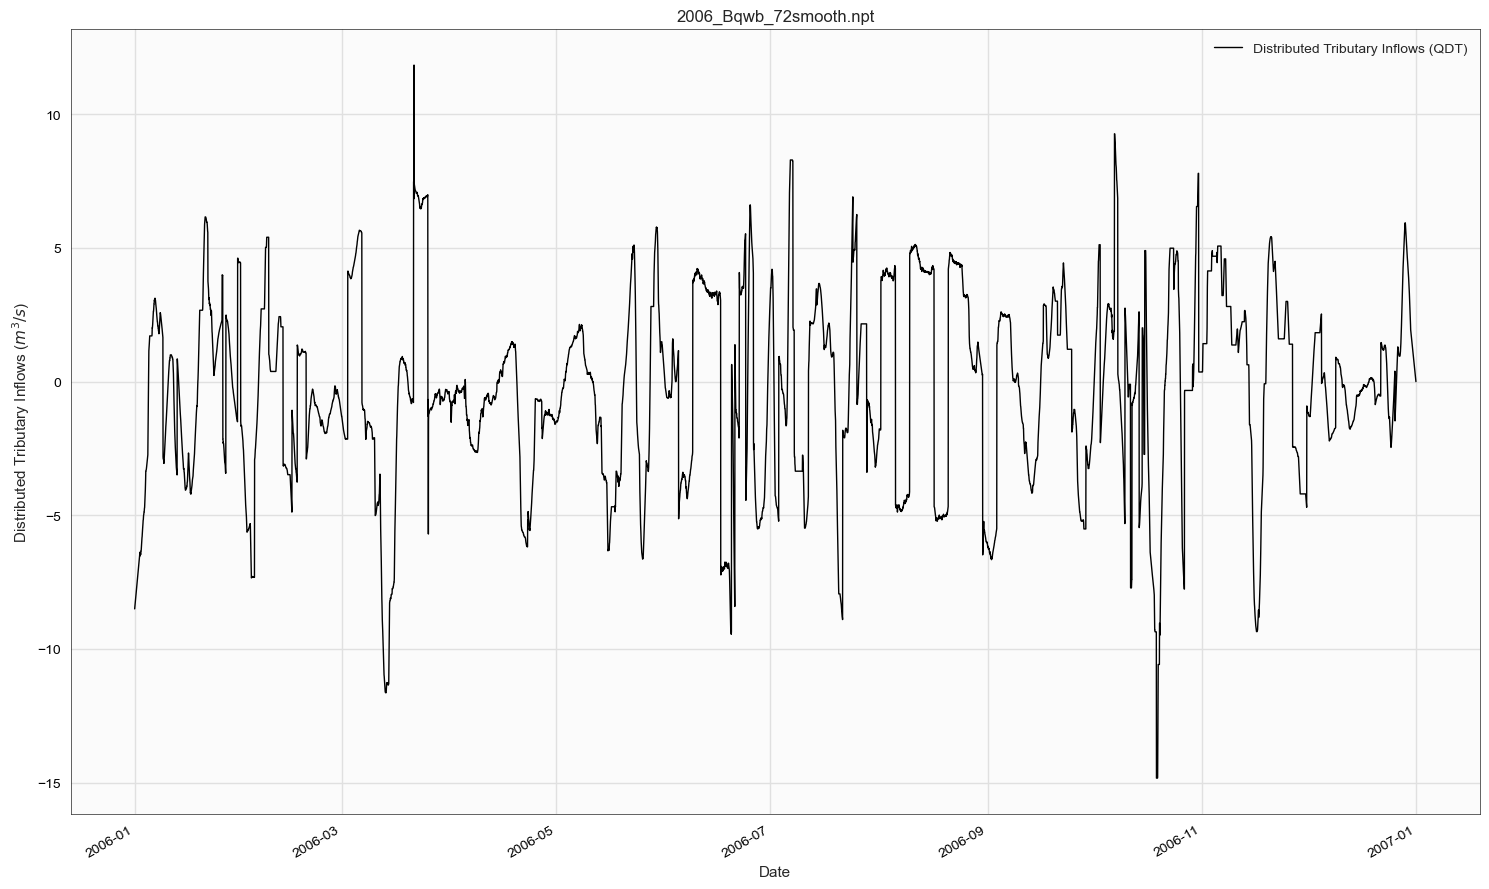

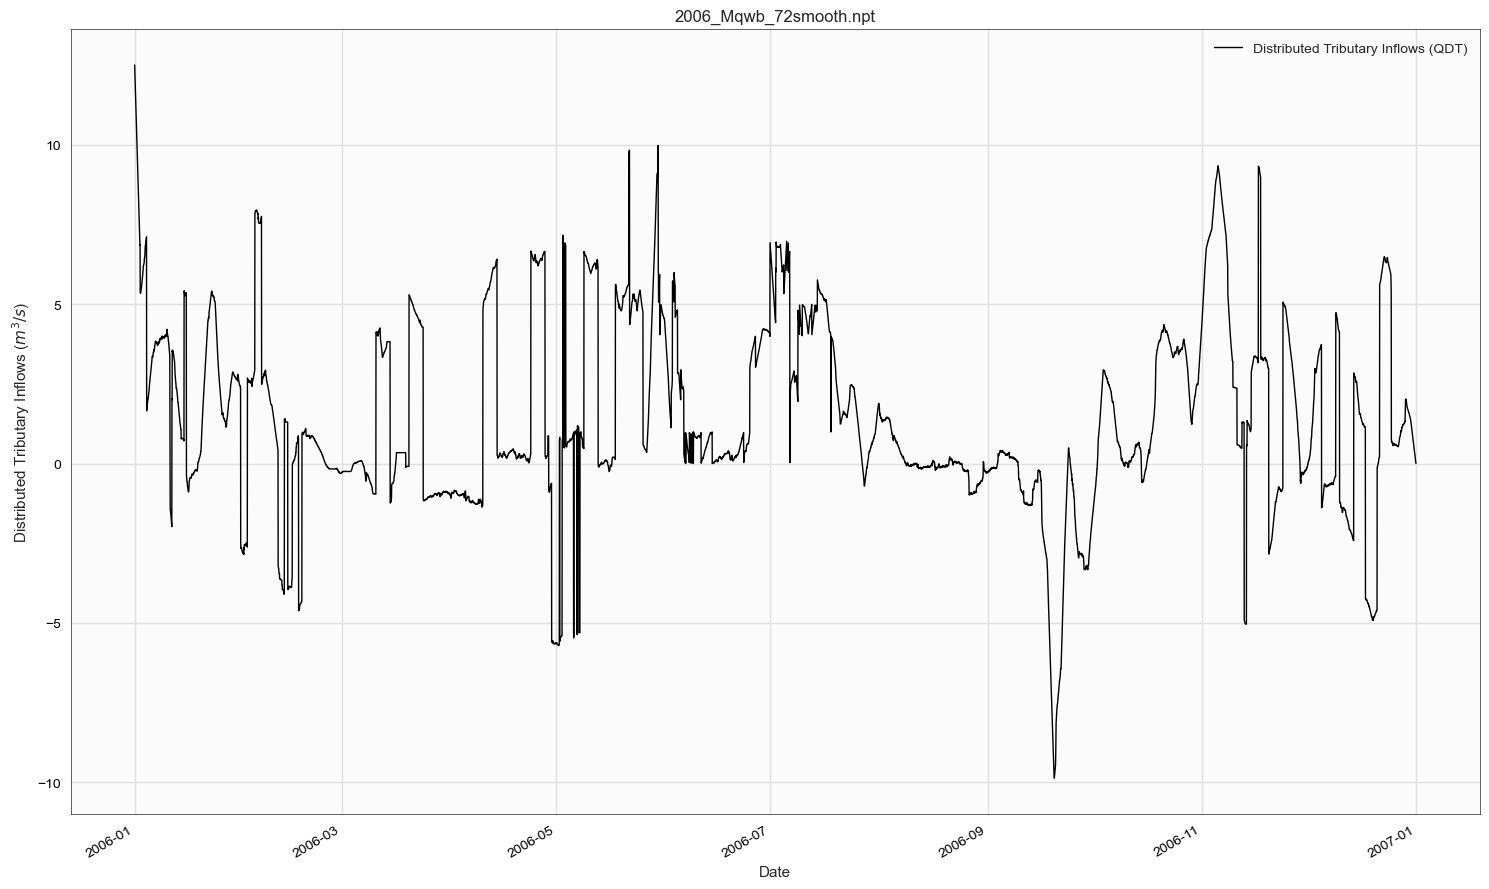

In [11]:
data_columns = ['Distributed Tributary Inflows (QDT)']

qdt_br1 = w2.read(os.path.join(data_path, '2006_Bqwb_72smooth.npt'), 2006, data_columns)
qdt_br5 = w2.read(os.path.join(data_path, '2006_Mqwb_72smooth.npt'), 2006, data_columns)

w2.plot(qdt_br1, title='2006_Bqwb_72smooth.npt', xlabel='Date', ylabel=f'Distributed Tributary Inflows ($m^3/s$)')
w2.plot(qdt_br5, title='2006_Mqwb_72smooth.npt', xlabel='Date', ylabel=f'Distributed Tributary Inflows ($m^3/s$)')

# Save data to SQLite database
qdt_br1.to_sql('qdt_br1', connection, if_exists='replace', index=True)
qdt_br5.to_sql('qdt_br5', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(qdt_br1, 'inputs/qdt_br1', 'berlin_2006.h5')
w2.write_hdf(qdt_br5, 'inputs/qdt_br5', 'berlin_2006.h5')

 ## TDT (distributed tributary inflow temperatures), Berlin Model, 2006

 Input files:
 * BR1: 2006_Btdt.npt
 * BR5: 2006_Mtdt.npt

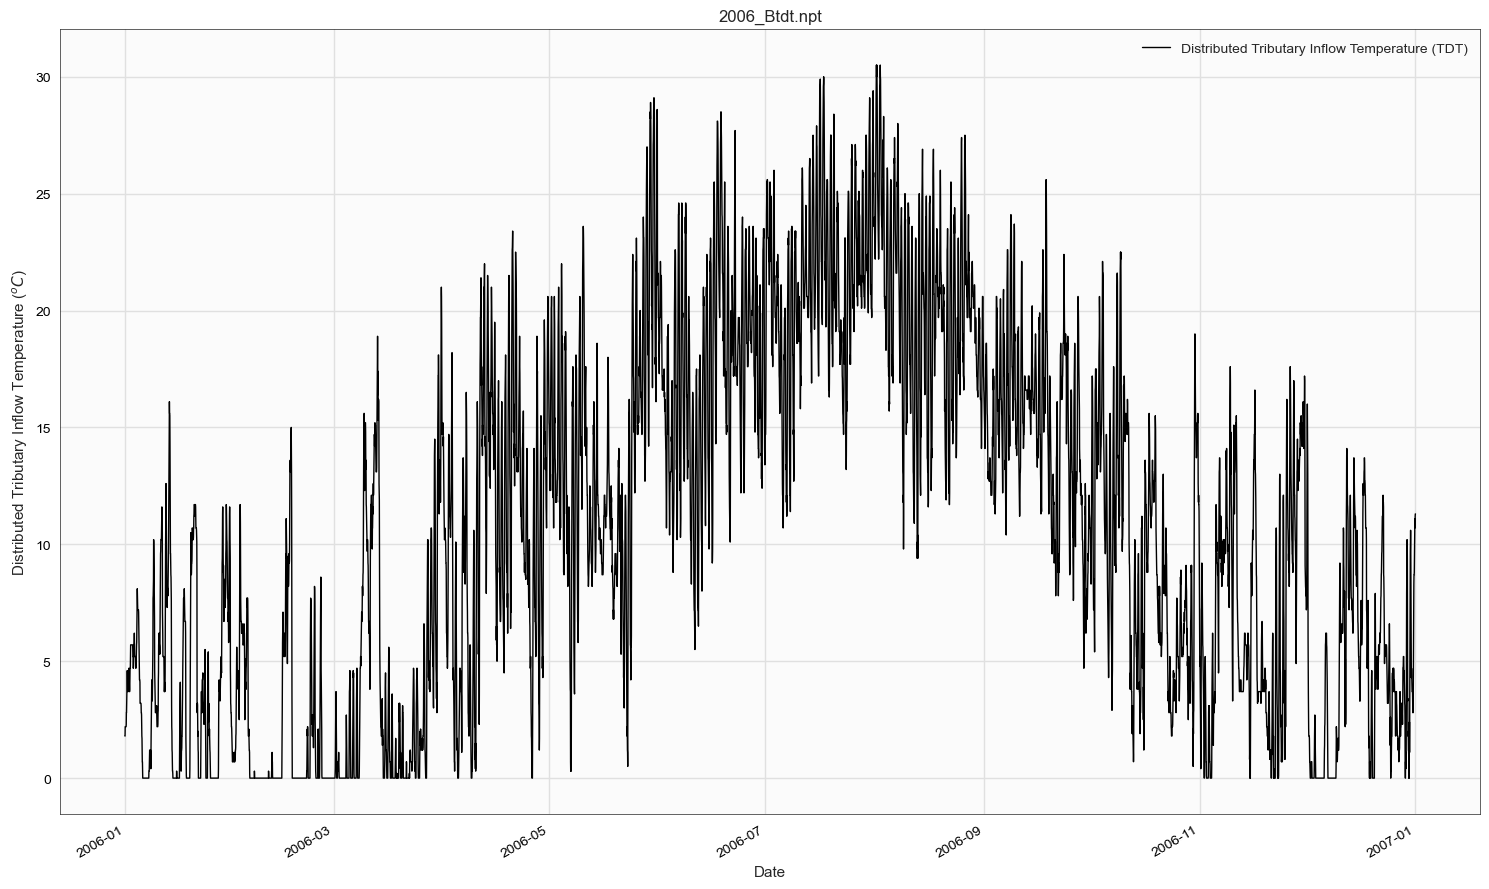

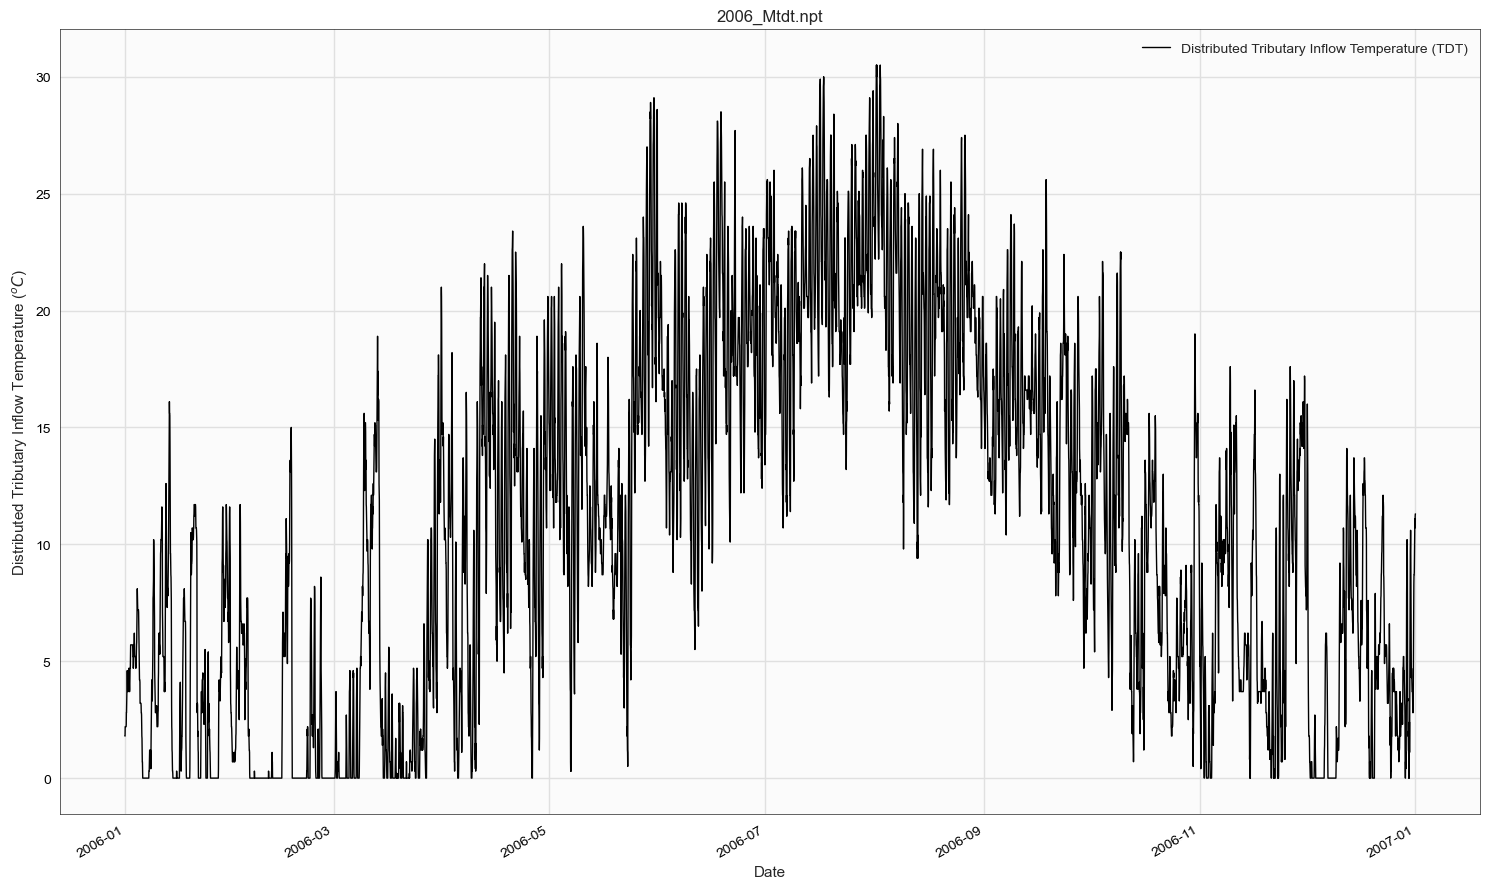

In [12]:
data_columns = ['Distributed Tributary Inflow Temperature (TDT)']

tdt_br1 = w2.read(os.path.join(data_path, '2006_Btdt.npt'), 2006, data_columns)
tdt_br5 = w2.read(os.path.join(data_path, '2006_Mtdt.npt'), 2006, data_columns)

w2.plot(tdt_br1, title='2006_Btdt.npt', ylabel=f'Distributed Tributary Inflow Temperature ($^oC$)')
w2.plot(tdt_br5, title='2006_Mtdt.npt', ylabel=f'Distributed Tributary Inflow Temperature ($^oC$)')

# Save data to SQLite database
tdt_br1.to_sql('tdt_br1', connection, if_exists='replace', index=True)
tdt_br5.to_sql('tdt_br5', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(tdt_br1, 'inputs/tdt_br1', 'berlin_2006.h5')
w2.write_hdf(tdt_br5, 'inputs/tdt_br5', 'berlin_2006.h5')

 ## CDT (distributed tributary constituent inflows), Berlin Model, 2006

 Input files:
 * BR1: 2006_MahoningR_Ctr1.npt
 * BR5: 2006_MahoningR_Ctr2.npt

 <h3> <font color="orange">
 Note: We don't need to analyze these because the CDT inputs use the CTR input files, which have been analyzed above
 </font> </h3>

 ## PRE (precipitation), Berlin Model, 2006

 Input files:
 * BR1: 2006_Pre.npt
 * BR2: 2006_Pre1.npt
 * BR3: 2006_Pre2.npt
 * BR4: 2006_Pre3.npt
 * BR5: 2006_Pre4.npt

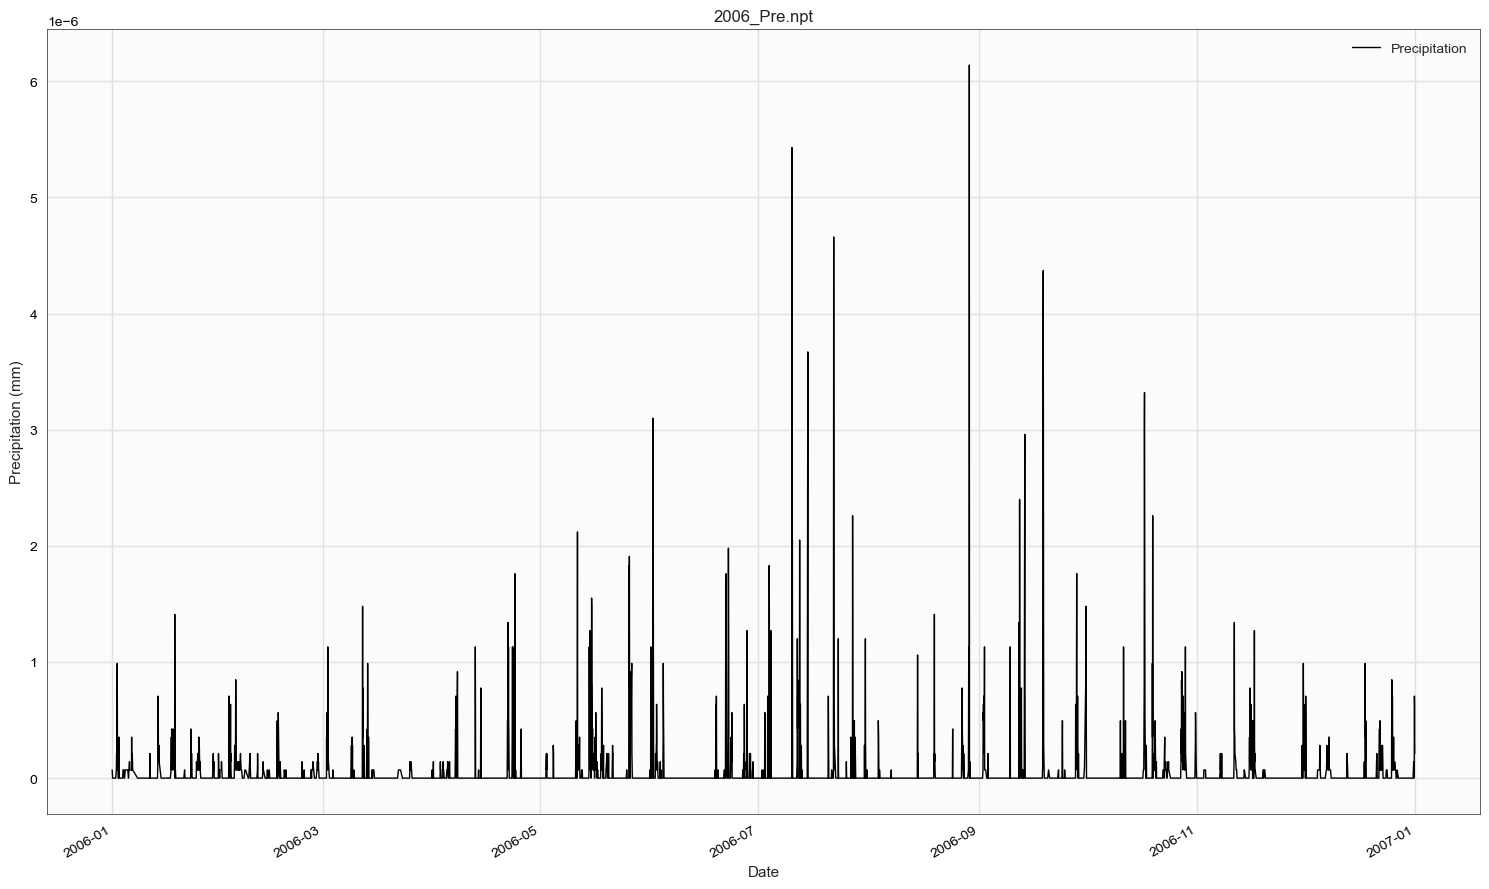

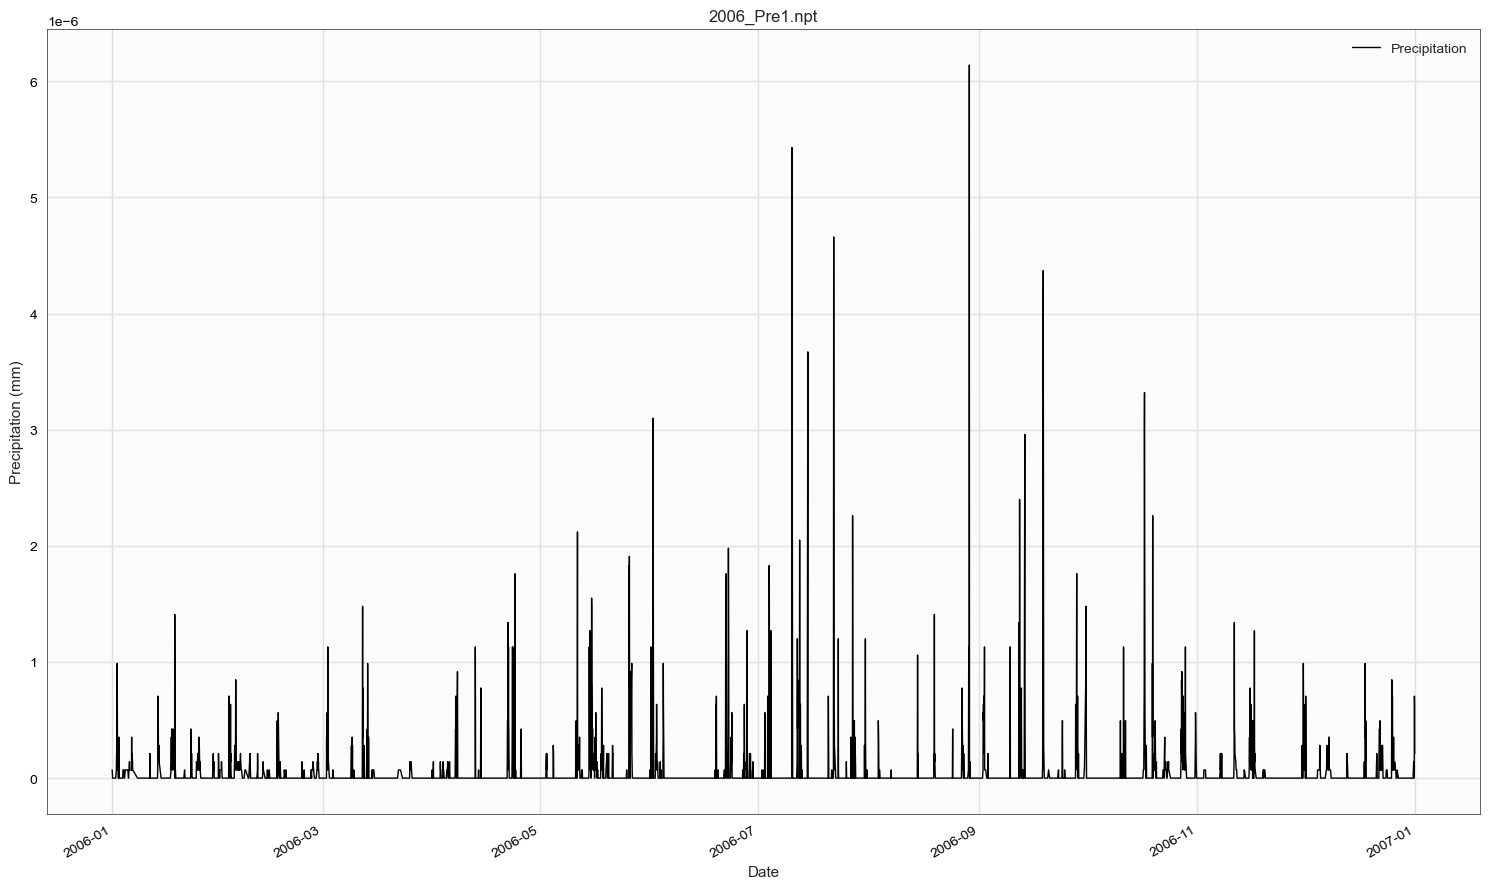

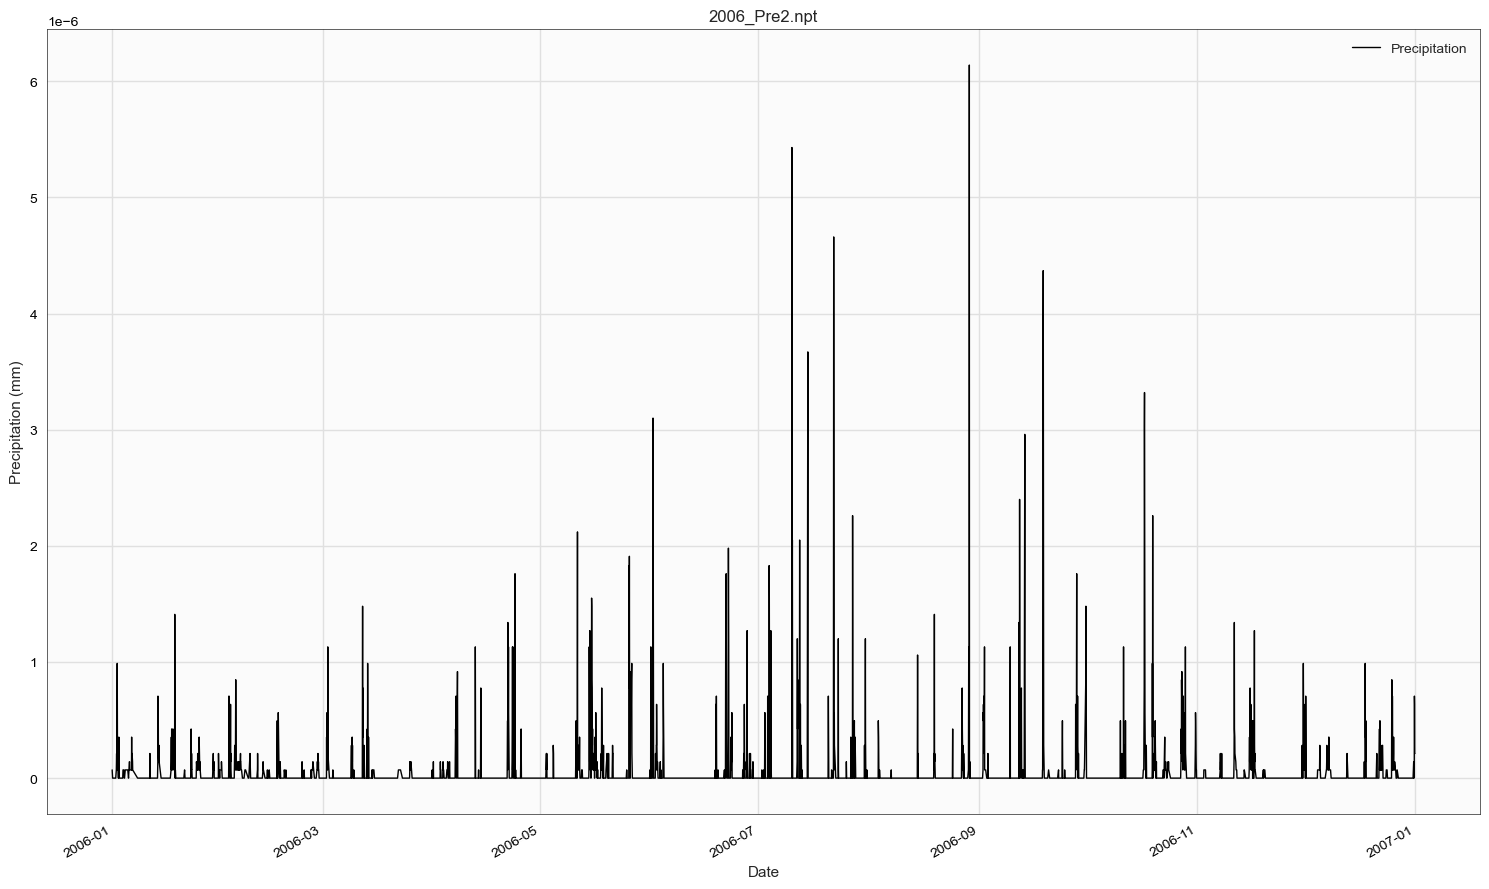

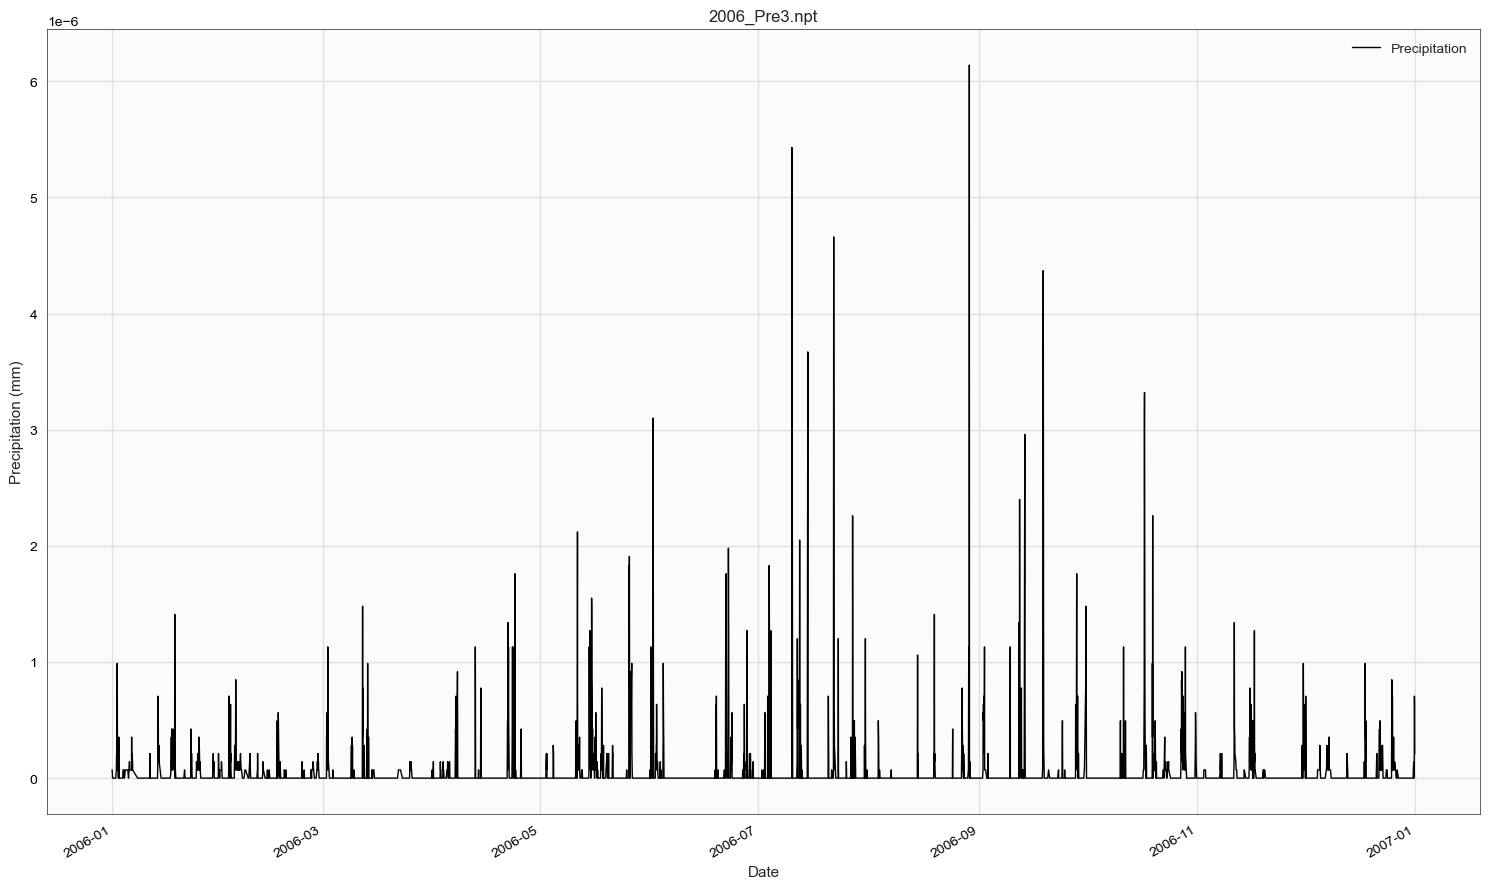

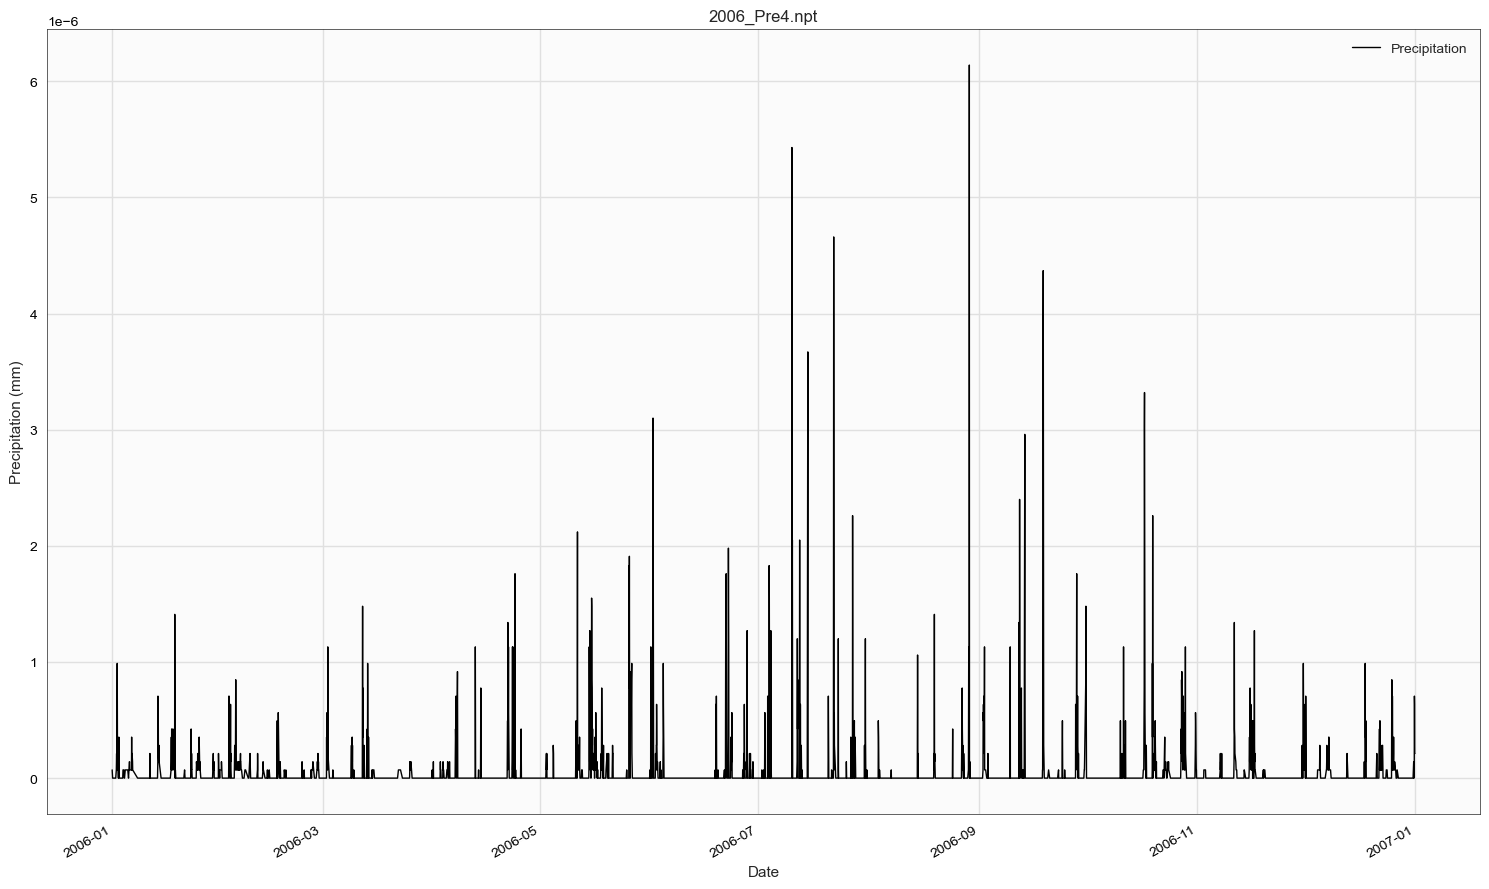

In [13]:
data_columns = ['Precipitation']

pre_br1 = w2.read(os.path.join(data_path, '2006_Pre.npt'), 2006, data_columns)
pre_br2 = w2.read(os.path.join(data_path, '2006_Pre1.npt'), 2006, data_columns)
pre_br3 = w2.read(os.path.join(data_path, '2006_Pre2.npt'), 2006, data_columns)
pre_br4 = w2.read(os.path.join(data_path, '2006_Pre3.npt'), 2006, data_columns)
pre_br5 = w2.read(os.path.join(data_path, '2006_Pre4.npt'), 2006, data_columns)

ylabel = 'Precipitation (mm)'
w2.plot(pre_br1, title='2006_Pre.npt', ylabel=ylabel)
w2.plot(pre_br2, title='2006_Pre1.npt', ylabel=ylabel)
w2.plot(pre_br3, title='2006_Pre2.npt', ylabel=ylabel)
w2.plot(pre_br4, title='2006_Pre3.npt', ylabel=ylabel)
w2.plot(pre_br5, title='2006_Pre4.npt', ylabel=ylabel)

# Save data to SQLite database
pre_br1.to_sql('pre_br1', connection, if_exists='replace', index=True)
pre_br2.to_sql('pre_br2', connection, if_exists='replace', index=True)
pre_br3.to_sql('pre_br3', connection, if_exists='replace', index=True)
pre_br4.to_sql('pre_br4', connection, if_exists='replace', index=True)
pre_br5.to_sql('pre_br5', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(pre_br1, 'inputs/pre_br1', 'berlin_2006.h5')
w2.write_hdf(pre_br2, 'inputs/pre_br2', 'berlin_2006.h5')
w2.write_hdf(pre_br3, 'inputs/pre_br3', 'berlin_2006.h5')
w2.write_hdf(pre_br4, 'inputs/pre_br4', 'berlin_2006.h5')
w2.write_hdf(pre_br5, 'inputs/pre_br5', 'berlin_2006.h5')

 ## TPR (precipitation temperature), Berlin Model, 2006
 * BR1: 2006_PreT_noneg.npt
 * BR2: 2006_PreT_noneg1.npt
 * BR3: 2006_PreT_noneg2.npt
 * BR4: 2006_PreT_noneg3.npt
 * BR5: 2006_PreT_noneg4.npt

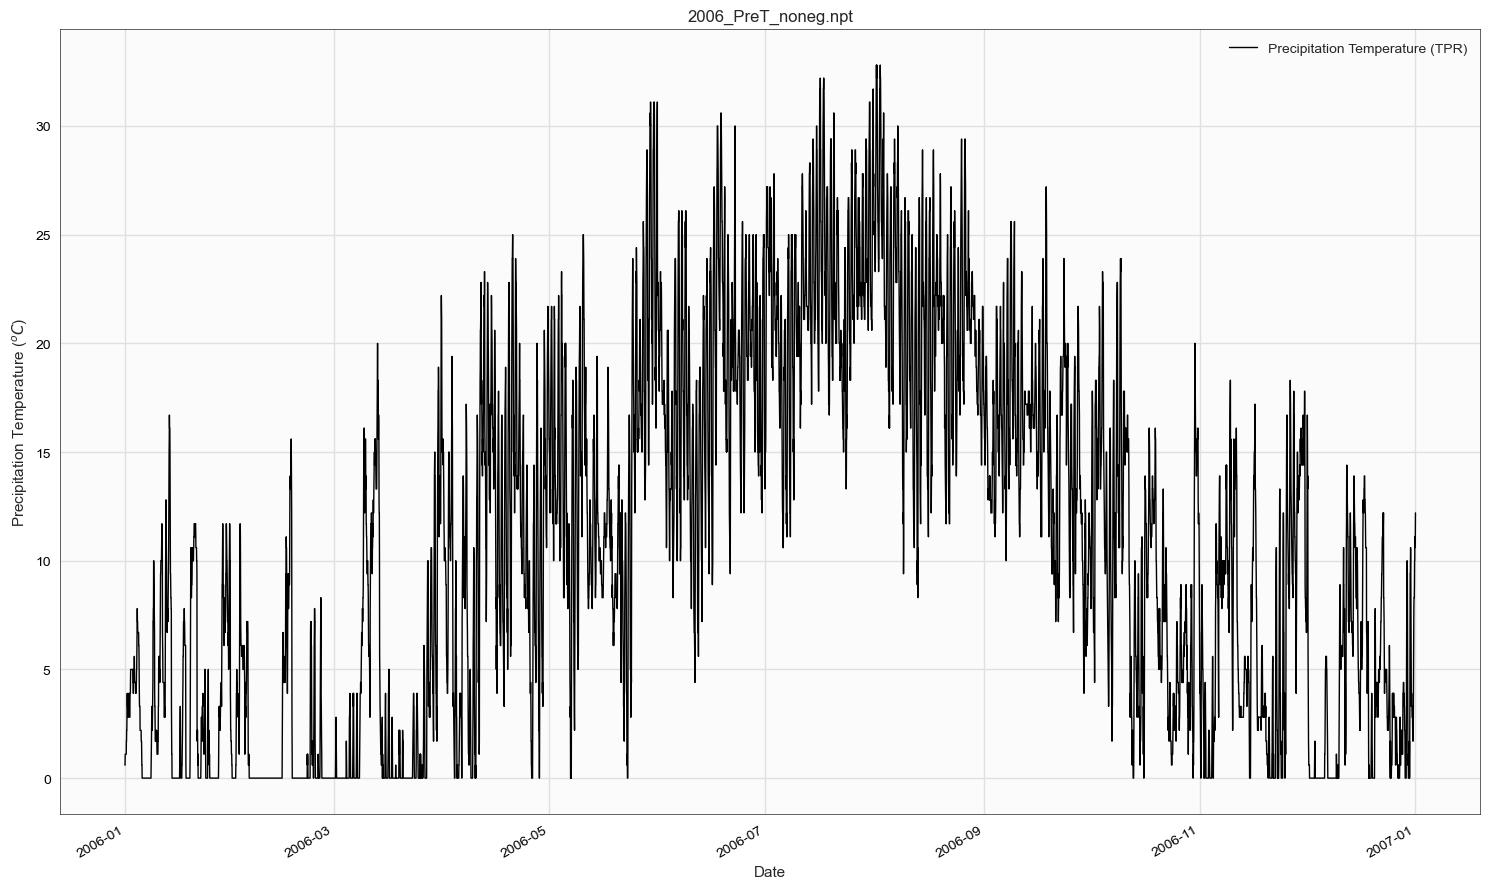

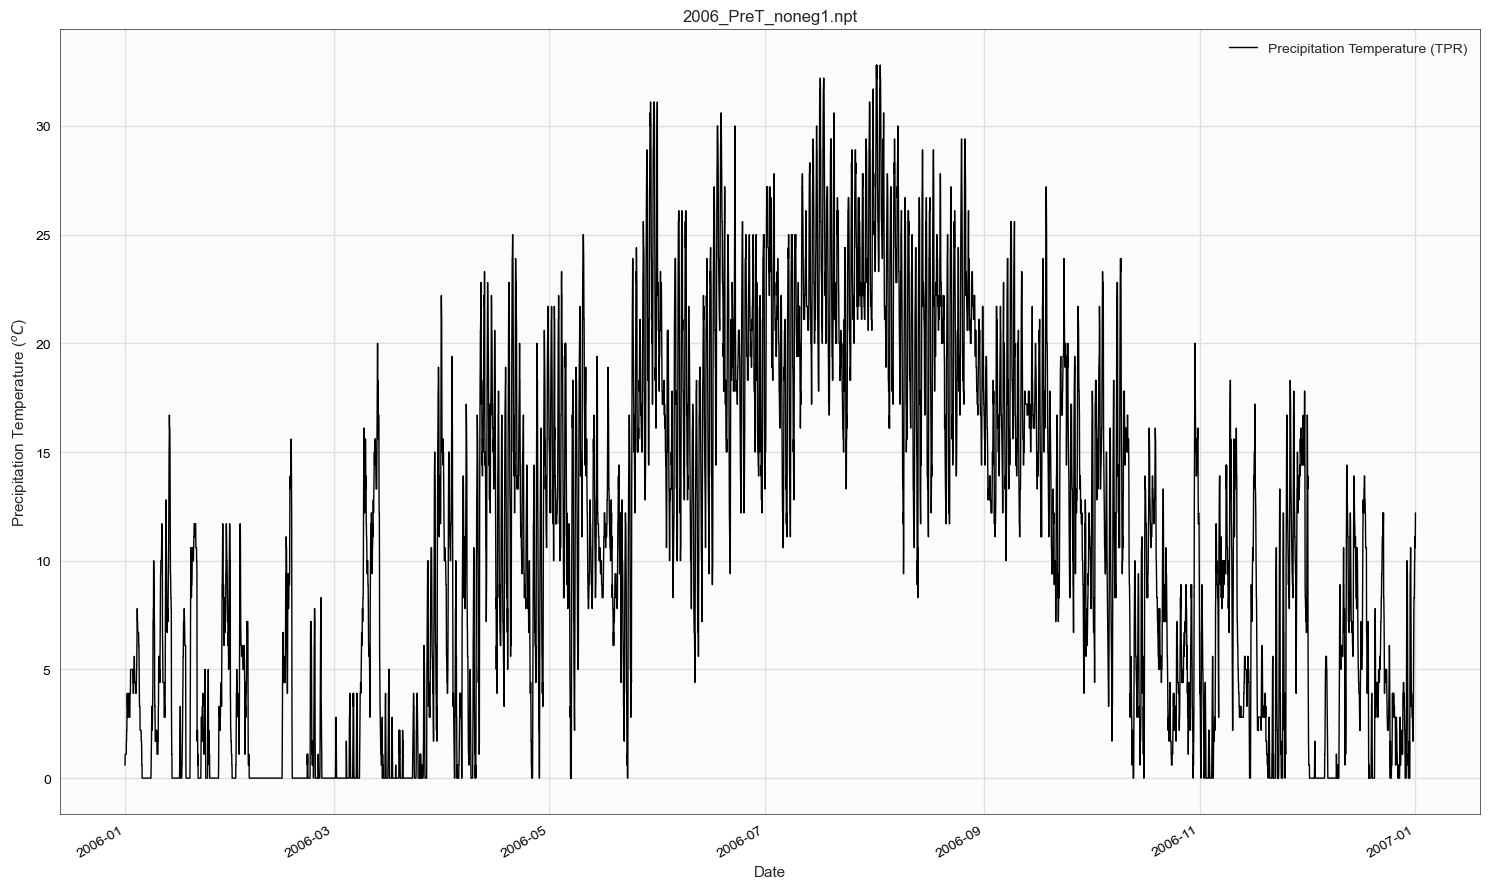

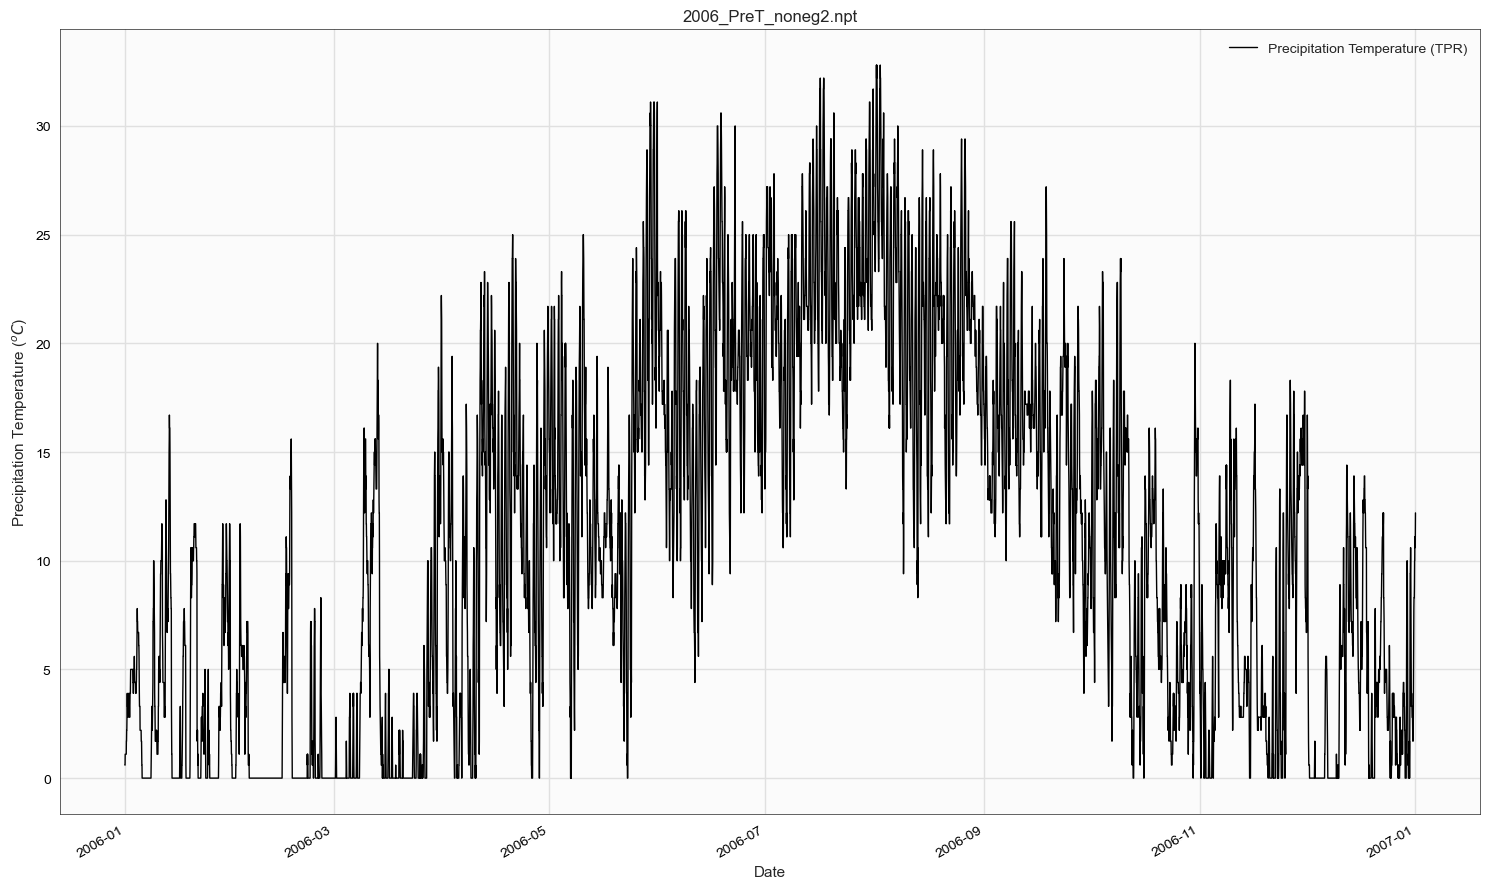

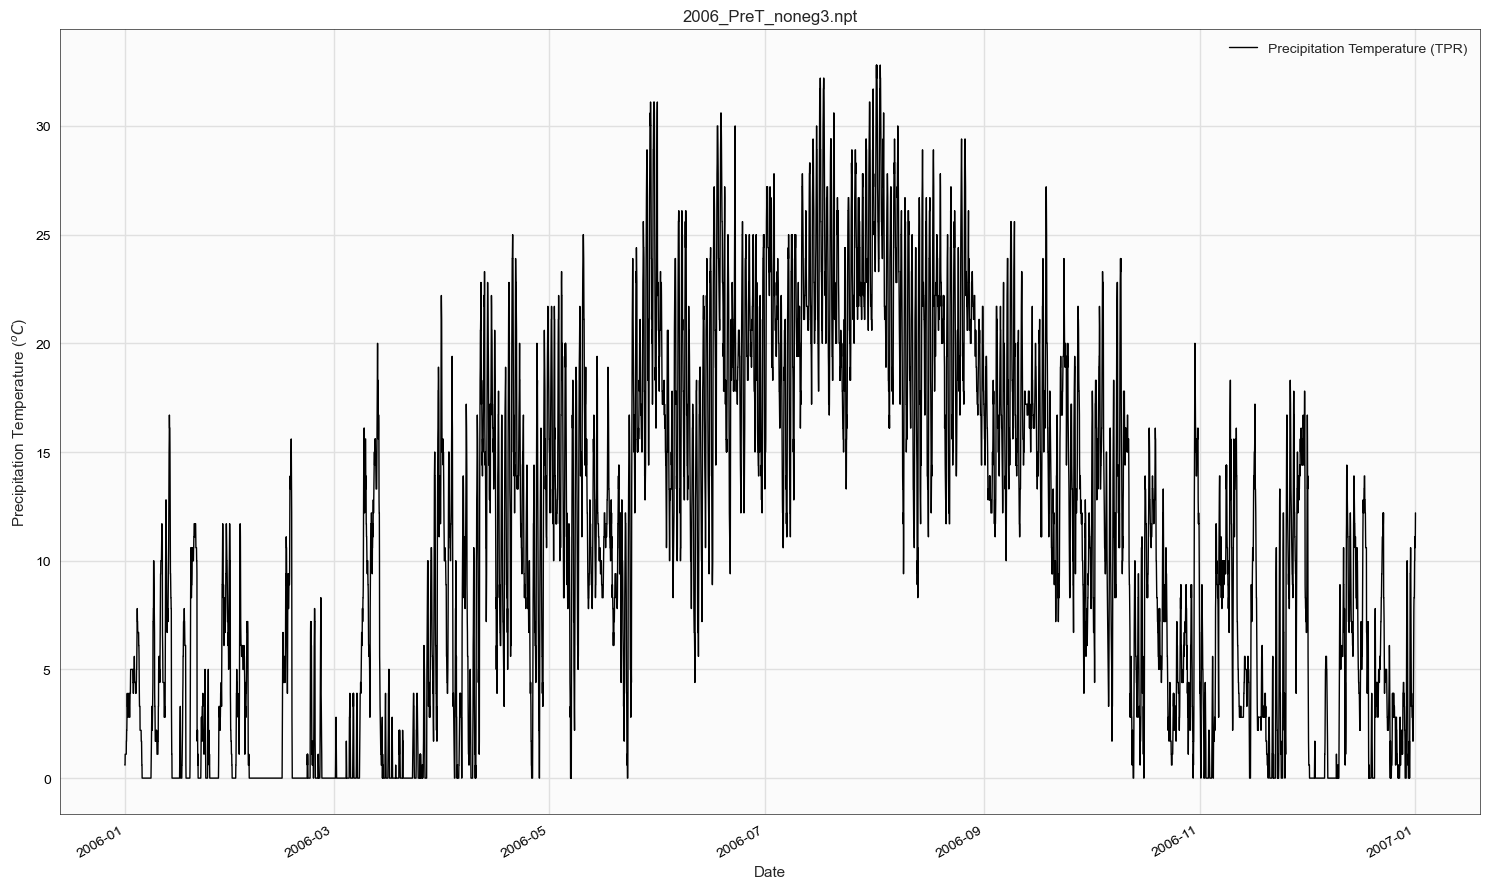

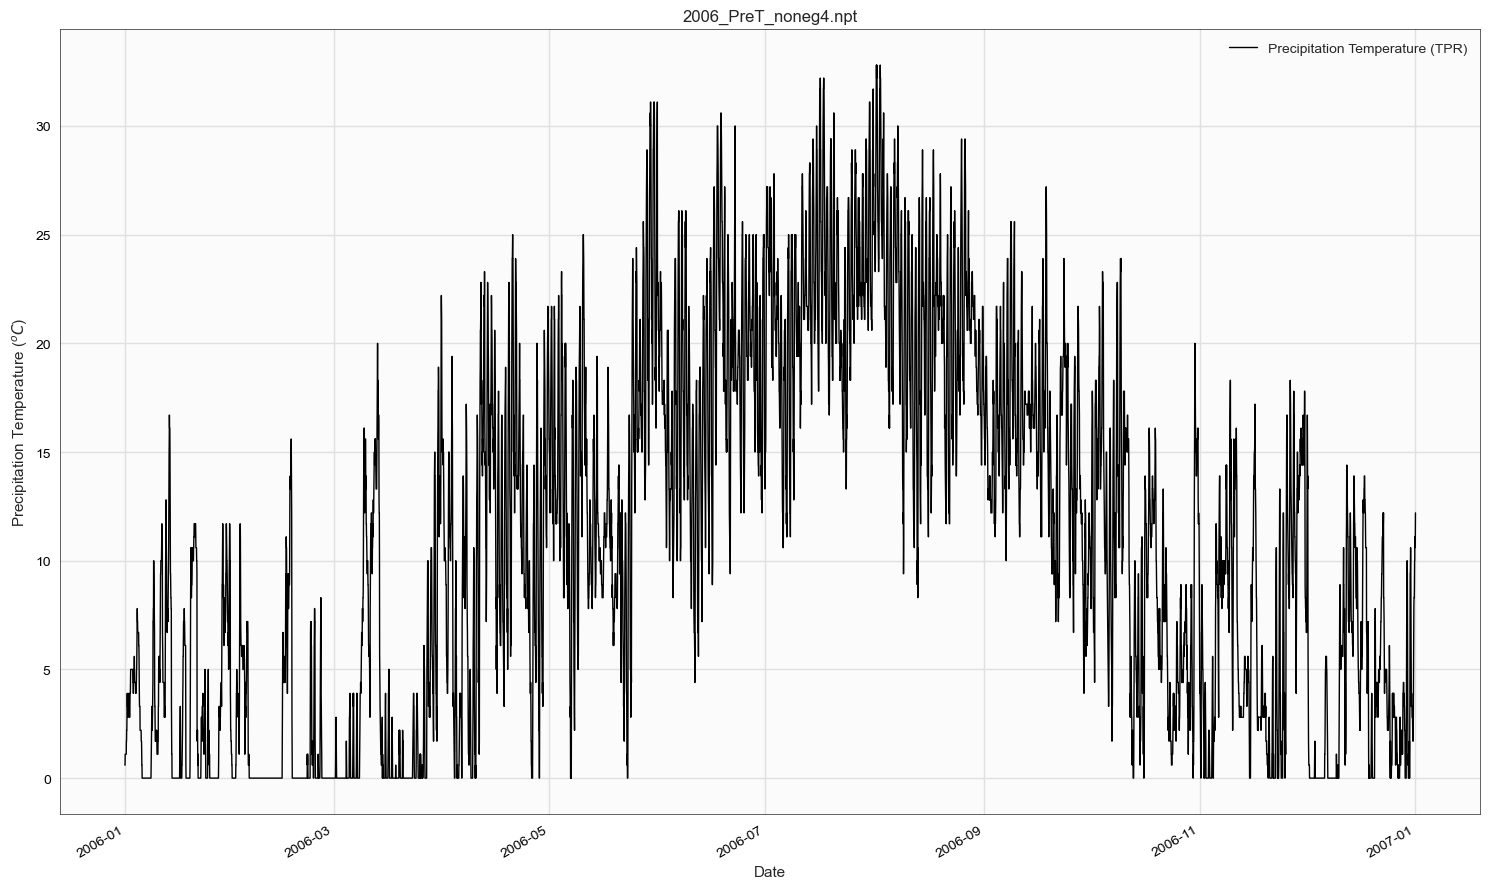

In [14]:
data_columns = ['Precipitation Temperature (TPR)']

tpr_br1 = w2.read(os.path.join(data_path, '2006_PreT_noneg.npt'), 2006, data_columns)
tpr_br2 = w2.read(os.path.join(data_path, '2006_PreT_noneg1.npt'), 2006, data_columns)
tpr_br3 = w2.read(os.path.join(data_path, '2006_PreT_noneg2.npt'), 2006, data_columns)
tpr_br4 = w2.read(os.path.join(data_path, '2006_PreT_noneg3.npt'), 2006, data_columns)
tpr_br5 = w2.read(os.path.join(data_path, '2006_PreT_noneg4.npt'), 2006, data_columns)

ylabel = 'Precipitation Temperature ($^oC$)'
w2.plot(tpr_br1, title='2006_PreT_noneg.npt', ylabel=ylabel)
w2.plot(tpr_br2, title='2006_PreT_noneg1.npt', ylabel=ylabel)
w2.plot(tpr_br3, title='2006_PreT_noneg2.npt', ylabel=ylabel)
w2.plot(tpr_br4, title='2006_PreT_noneg3.npt', ylabel=ylabel)
w2.plot(tpr_br5, title='2006_PreT_noneg4.npt', ylabel=ylabel)

# Save data to SQLite database
tpr_br1.to_sql('tpr_br1', connection, if_exists='replace', index=True)
tpr_br2.to_sql('tpr_br2', connection, if_exists='replace', index=True)
tpr_br3.to_sql('tpr_br3', connection, if_exists='replace', index=True)
tpr_br4.to_sql('tpr_br4', connection, if_exists='replace', index=True)
tpr_br5.to_sql('tpr_br5', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(tpr_br1, 'inputs/tpr_br1', 'berlin_2006.h5')
w2.write_hdf(tpr_br2, 'inputs/tpr_br2', 'berlin_2006.h5')
w2.write_hdf(tpr_br3, 'inputs/tpr_br3', 'berlin_2006.h5')
w2.write_hdf(tpr_br4, 'inputs/tpr_br4', 'berlin_2006.h5')
w2.write_hdf(tpr_br5, 'inputs/tpr_br5', 'berlin_2006.h5')

 --------------------------------
 ## Analyze Outputs
 --------------------------------

 ## CWO (constituent outflows), Berlin Model, 2006
 * SEG 37: cwo_37_wdo.csv
 * SEG 75: cwo_75_wdo.csv

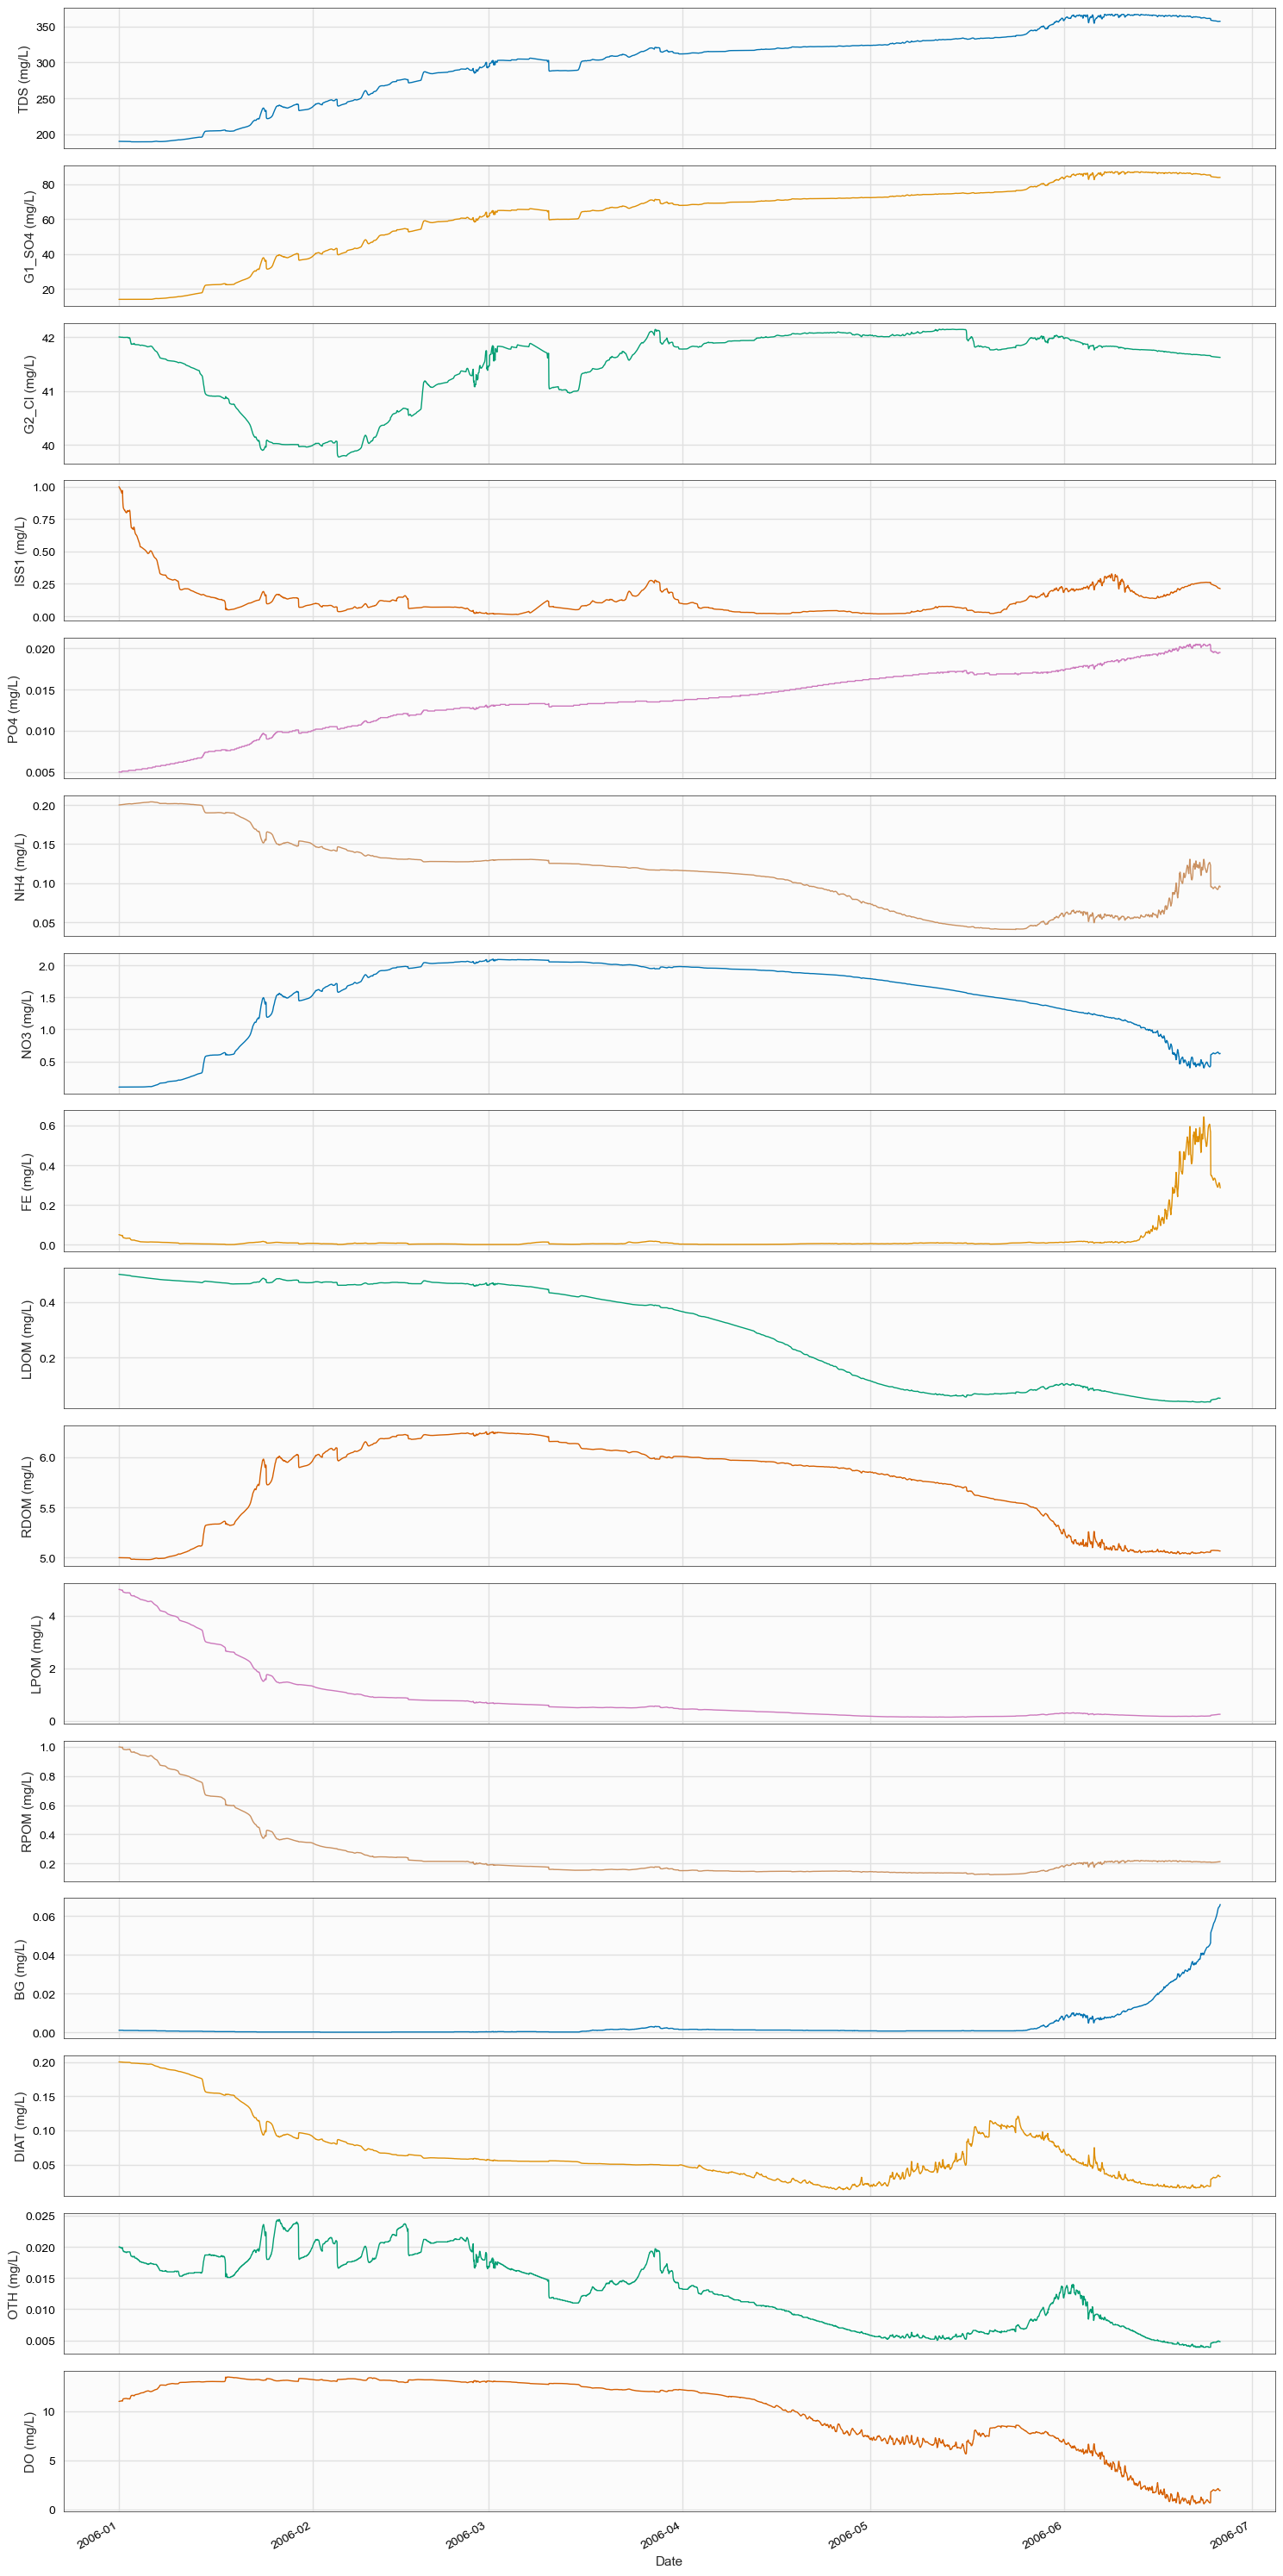

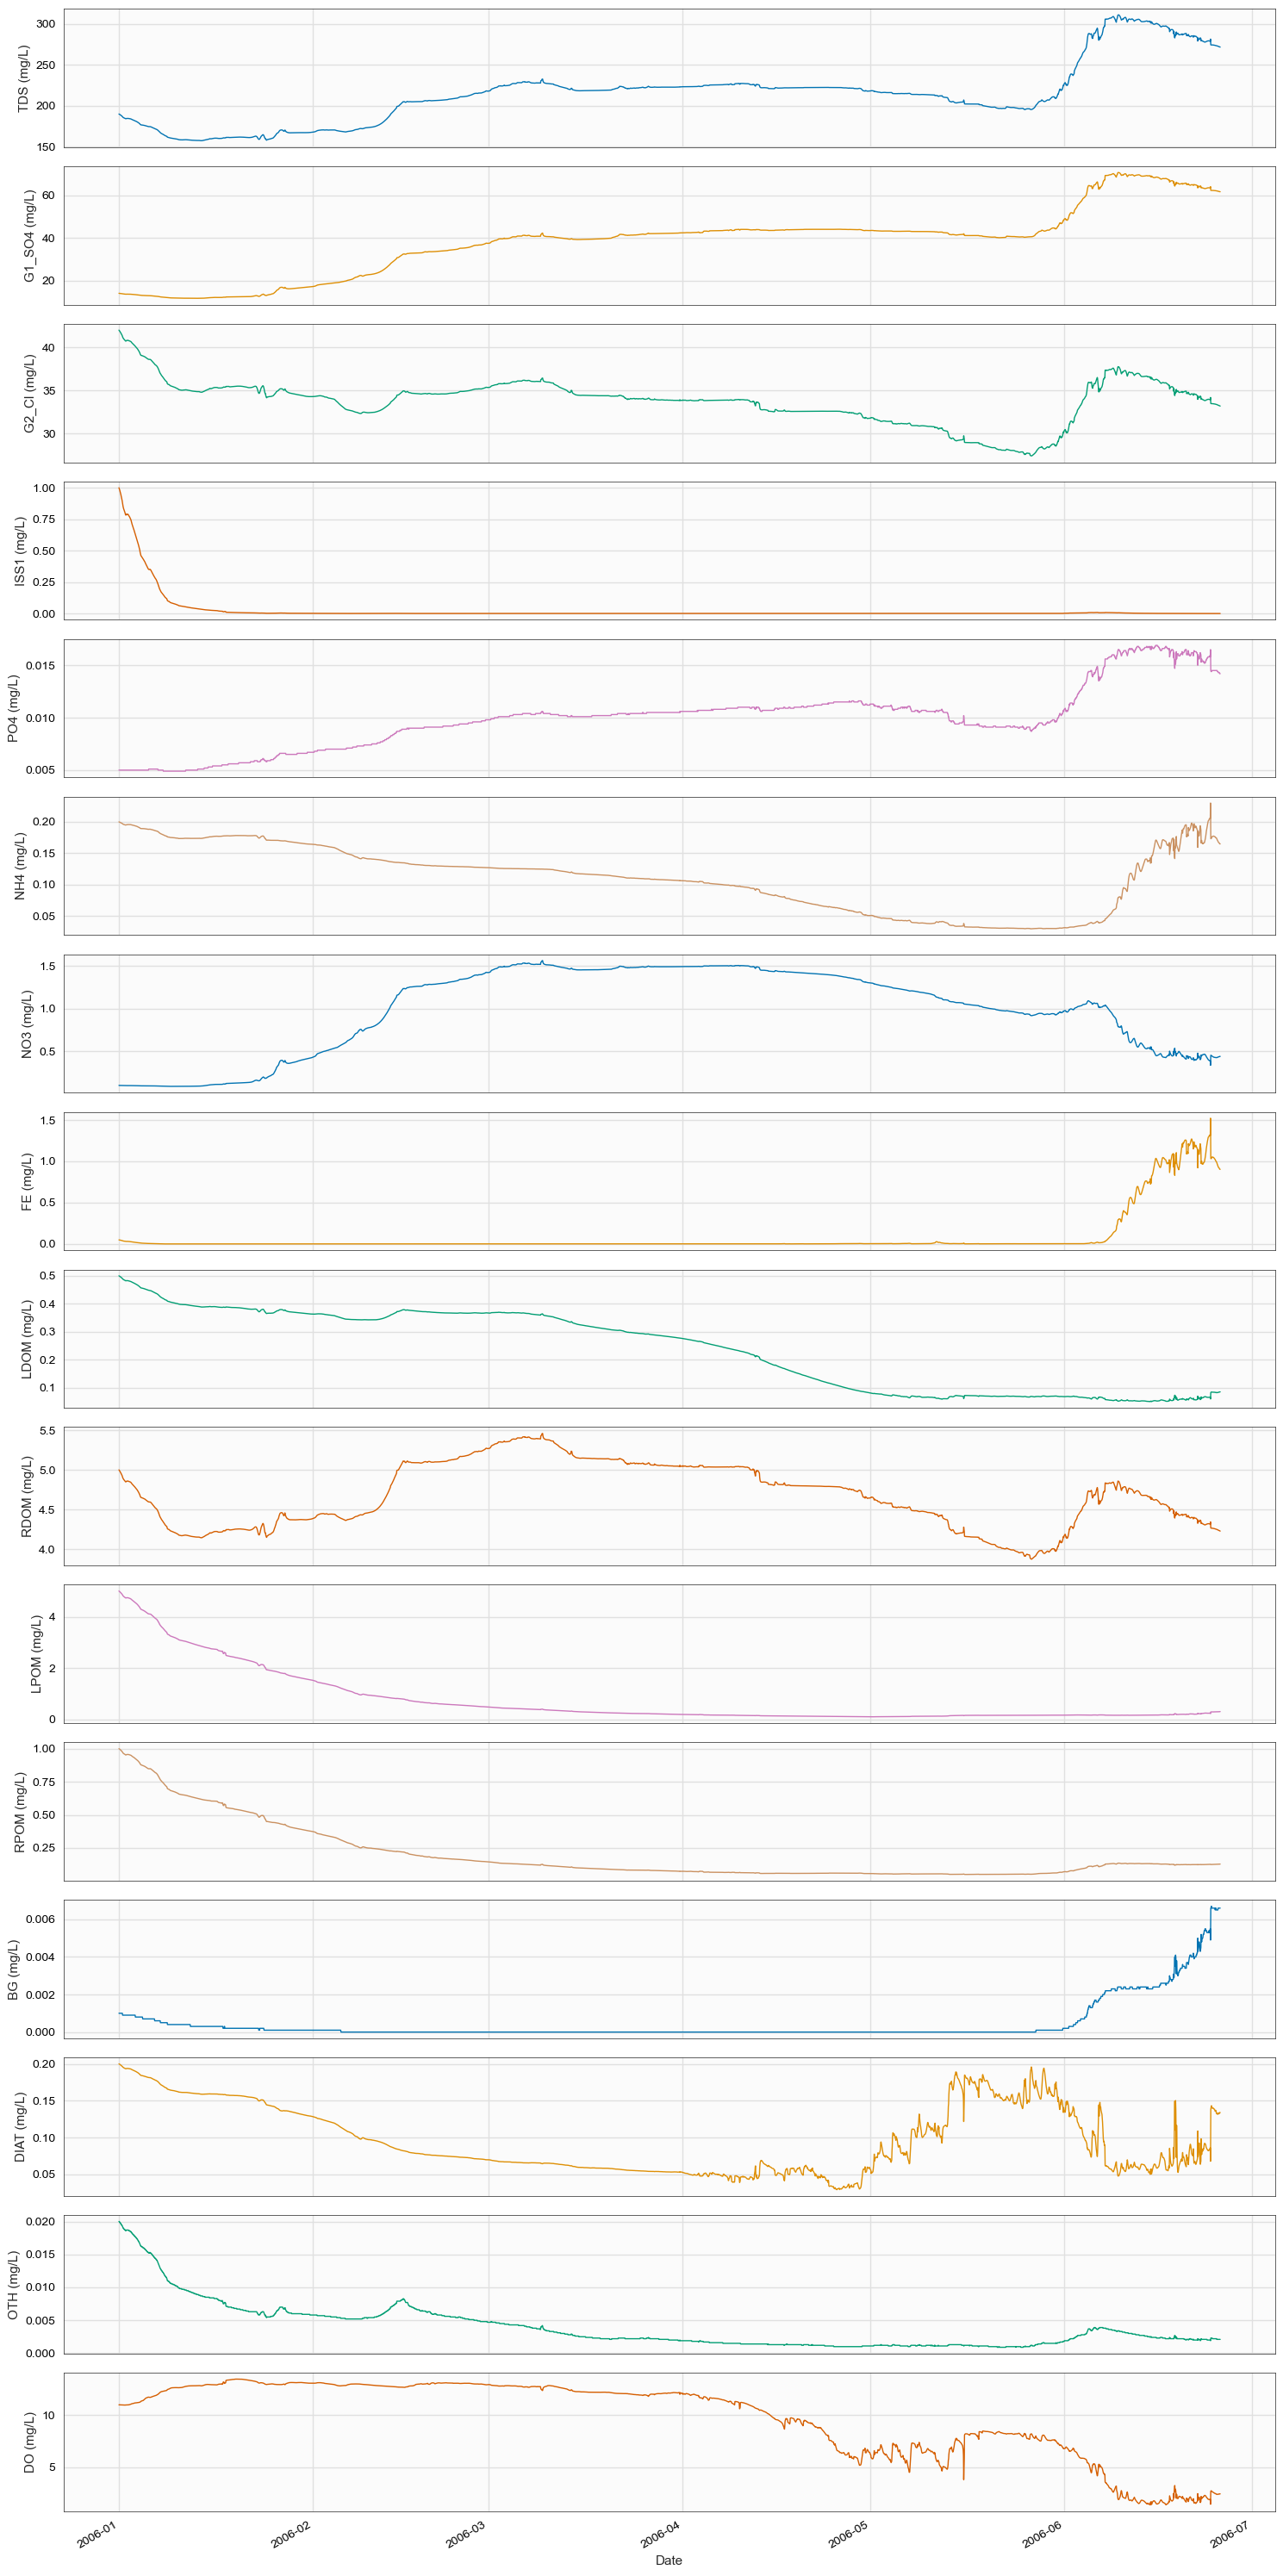

In [15]:
# Constituents list: Include an extra "constituent" to the extra column that will be added due to a trailing comma.
constituents = ['TDS', 'G1_SO4', 'G2_Cl', 'ISS1', 'PO4', 'NH4', 'NO3', 'FE', 'LDOM', 'RDOM', 'LPOM', 'RPOM', 'BG', 'DIAT', 'OTH', 'DO']
cwo_37 = w2.read(os.path.join(data_path, 'cwo_37_wdo.csv'), 2006, constituents)
cwo_75 = w2.read(os.path.join(data_path, 'cwo_75_wdo.csv'), 2006, constituents)

ylabels = [
    'TDS (mg/L)', 'G1_SO4 (mg/L)', 'G2_Cl (mg/L)', 'ISS1 (mg/L)', 'PO4 (mg/L)', 'NH4 (mg/L)', 'NO3 (mg/L)', 'FE (mg/L)',
    'LDOM (mg/L)', 'RDOM (mg/L)', 'LPOM (mg/L)', 'RPOM (mg/L)', 'BG (mg/L)', 'DIAT (mg/L)', 'OTH (mg/L)', 'DO (mg/L)']
w2.multi_plot(cwo_37, figsize=(15, 30), ylabels=ylabels)
w2.multi_plot(cwo_75, figsize=(15, 30), ylabels=ylabels)

# Save data to SQLite database
cwo_37.to_sql('cwo_37', connection, if_exists='replace', index=True)
cwo_75.to_sql('cwo_75', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(cwo_37, 'outputs/cwo_37', 'berlin_2006.h5')
w2.write_hdf(cwo_75, 'outputs/cwo_75', 'berlin_2006.h5')

 ## DWO (derived constituent outflows), Berlin Model, 2006
 * SEG 37: dwo_37_wdo.csv
 * SEG 75: dwo_75_wdo.csv

TKN      TP    CHLA     TSS
Date                                                   
2006-01-01 00:00:00.000  0.0000  0.0000  0.0000  0.0000
2006-01-01 01:00:00.800  1.1375  0.0636  4.4195  7.2167
2006-01-01 02:00:00.800  1.1373  0.0636  4.4188  7.2096
2006-01-01 03:00:00.000  1.1370  0.0636  4.4178  7.1997
2006-01-01 04:00:00.800  1.1369  0.0636  4.4177  7.1983
...                         ...     ...     ...     ...
2006-06-25 17:00:00.600  0.5503  0.0479  2.0518  0.7734
2006-06-25 18:00:00.400  0.5504  0.0479  2.0502  0.7729
2006-06-25 19:00:00.200  0.5504  0.0479  2.0493  0.7725
2006-06-25 20:00:00.600  0.5501  0.0479  2.0546  0.7726
2006-06-25 21:00:00.400  0.5495  0.0479  2.0687  0.7733

[4222 rows x 4 columns]

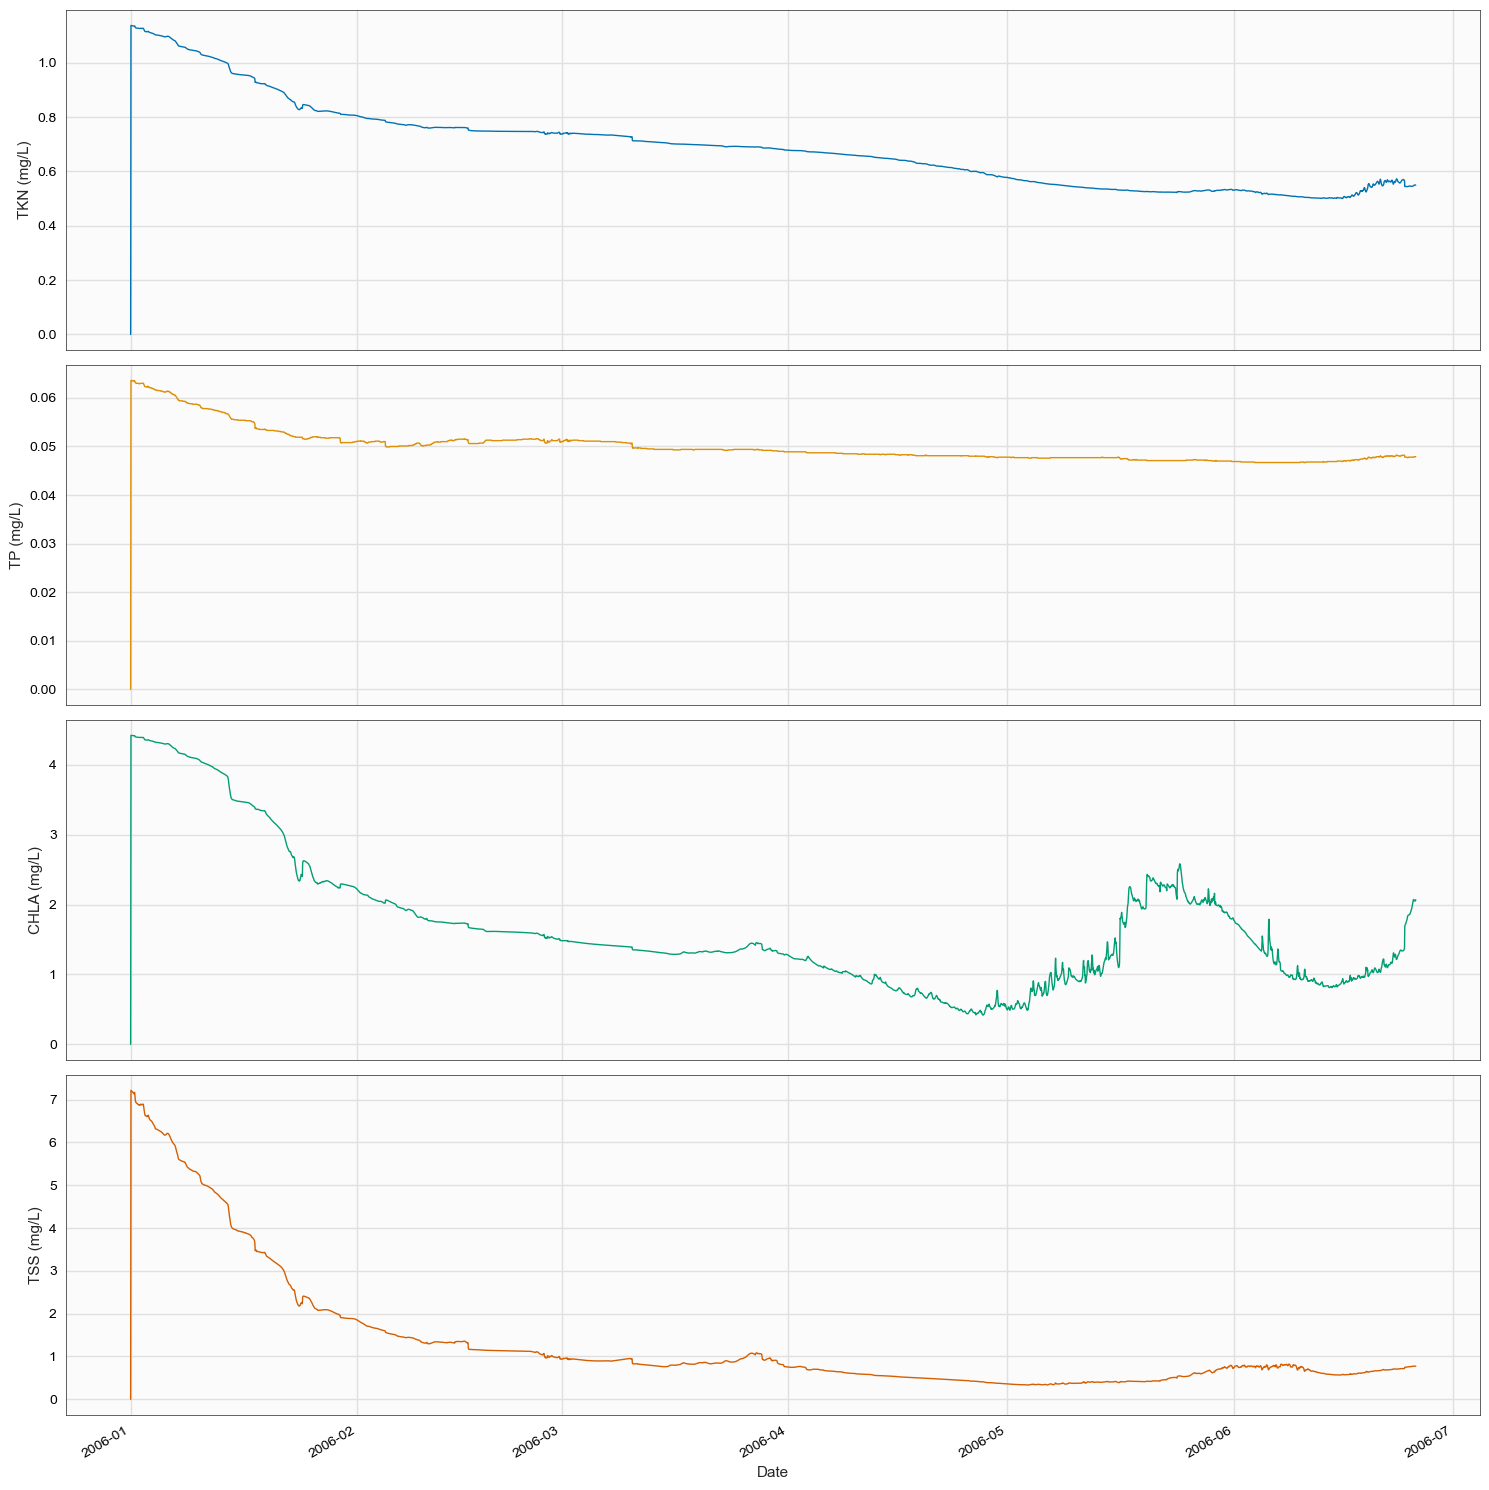

In [16]:
# Constituents list: Include an extra "constituent" to the extra column that will be added due to a trailing comma.
constituents = ['TKN', 'TP', 'CHLA', 'TSS']
dwo_37 = w2.read(os.path.join(data_path, 'dwo_37_wdo.csv'), 2006, constituents)

# The following file has times only, no data
# dwo_75 = w2.TimeSeries('BerlinMilton2006/dwo_75_wdo.csv', 2006, constituents)

ylabels = ['TKN (mg/L)', 'TP (mg/L)', 'CHLA (mg/L)', 'TSS (mg/L)']
w2.multi_plot(dwo_37, figsize=(15, 15), ylabels=ylabels)
display(dwo_37)

# Save data to SQLite database
dwo_37.to_sql('dwo_37', connection, if_exists='replace', index=True)

# Save data to HDF5
w2.write_hdf(dwo_37, 'outputs/dwo_37', 'berlin_2006.h5')